#  Ensemble Learning
We shall deal with two major ensemble learning methodologies:
Bagging and Stacking.

We use the following implemented models as base estimators:
- Decision Trees (Can use sklearn)
- Logistic and Linear Regressor for Classification and Regression respectively.
- Multi-Layer Perceptron

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, accuracy_score

Data Loading
For regression - Boston Housing Dataset
For classification - Wine Quality Dataset

In [2]:
boston = pd.read_csv('data/HousingData.csv')
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [3]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Preprocessing - feature selection then standardization
boston = boston[~(boston['MEDV'] >= 50.0)]
boston = SimpleImputer(strategy='median').fit_transform(boston)
X_boston, y_boston = boston[:, :-1], boston[:, -1]
X_boston = StandardScaler().fit_transform(X_boston)
X_boston = X_boston.astype(np.float64)

In [5]:
wine = pd.read_csv('data/WineQT.csv').drop('Id', axis=1)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
# Preprocessing - standardization
X_wine, y_wine = wine.drop('quality', axis=1), wine['quality']
X_wine = StandardScaler().fit_transform(X_wine)
X_wine = X_wine.astype(np.float64)

In [7]:
# Train test val split
from sklearn.model_selection import train_test_split

X_boston_train, X_boston_test, y_boston_train, y_boston_test = train_test_split(X_boston, y_boston, test_size=0.2, random_state=42)

X_wine_train, X_wine_test, y_wine_train, y_wine_test = train_test_split(X_wine, y_wine, test_size=0.2, random_state=42)

y_boston_train = y_boston_train.reshape(-1,1)
y_boston_test = y_boston_test.reshape(-1,1)

y_wine_train = y_wine_train.to_numpy()
y_wine_test = y_wine_test.to_numpy()

## 3.1 Implementation


Decision Tree is imported from sklearn. We provide implementation for Logistic, Linear Regression and MLP.

### Static functions

In [8]:
# Static functions for the models
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True)

def softmax_deriv(z):
    return softmax(z) * (1 - softmax(z))

def relu(z):
    return np.maximum(0, z)

def relu_deriv(z):
    return np.where(z > 0, 1, 0)

def cross_entropy_loss(activations, y_hat_one_hot):
        loss = -np.sum(y_hat_one_hot * np.log(activations)) / len(y_hat_one_hot)   
        return loss  

### Logistic Regression

In [9]:
class MultinomialLogRegression:
    def __init__(self, learning_rate=0.01, max_iter=100):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.weights = None
        self.bias = None
        self.classes = None
        self.n_features = None
        self.n_classes = None
        self.n_samples = None
        self.loss = None
        
    def initialize_with_random(self, n_classes, n_features):
        self.weights = np.random.randn(n_features, n_classes)
        self.bias = np.random.randn(1, n_classes)
        
    def encode_labels(self, y):
        if self.classes is None:
            self.classes = np.unique(y)
            self.n_classes = len(self.classes)
        class_idx = dict()
        for i in range(self.n_classes):
            class_idx[self.classes[i]] = i
        
        y_one_hot = np.zeros((len(y), self.n_classes))
        for i in range(len(y)):
            y_one_hot[i][class_idx[y[i]]] = 1
            
        return y_one_hot
    
    def perform_gradient_descent(self, X, y_hat_one_hot, activations):
        dw = (1 / self.n_samples) * np.dot(X.T, (activations - y_hat_one_hot))
        db = (1 / self.n_samples) * np.sum(activations - y_hat_one_hot, axis=0)
        self.weights -= self.learning_rate * dw
        self.bias -= self.learning_rate * db
        
    def fit(self, X, y):
        self.n_samples, self.n_features = X.shape
        y_one_hot = self.encode_labels(y)
        self.initialize_with_random(self.n_classes, self.n_features)
        self.train(X, y_one_hot)
    
    def train(self, X, y_hat_one_hot):
        for i in range(1, self.max_iter + 1):
            z = np.dot(X, self.weights) + self.bias
            activations = softmax(z)
            loss = cross_entropy_loss(activations, y_hat_one_hot)
            self.perform_gradient_descent(X, y_hat_one_hot, activations)
                
        z = np.dot(X, self.weights) + self.bias
        activations = softmax(z)
        loss = cross_entropy_loss(activations, y_hat_one_hot)
        return accuracy_score(np.argmax(activations, axis=1), np.argmax(y_hat_one_hot, axis=1)), loss
                  
    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        activations = softmax(z)
        class_indices = np.argmax(activations, axis=1)
        y_pred = np.array([self.classes[i] for i in class_indices])
        return  y_pred
    
    def predict_proba(self, X):
        z = np.dot(X, self.weights) + self.bias
        activations = softmax(z)
        return activations

### Linear Regression

In [10]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, max_iter=100):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.weights = None
        self.bias = None
        self.n_features = None
        self.n_samples = None
        self.loss = None
        
    def initialize_with_random(self, n_features):
        self.weights = np.random.randn(n_features, 1) / np.sqrt(n_features)
        self.bias = np.zeros((1, 1))
    
    def perform_gradient_descent(self, X, y_hat, y):
        dw = (1 / self.n_samples) * np.dot(X.T, (y_hat - y))
        db = (1 / self.n_samples) * np.sum(y_hat - y, axis=0)
        np.nan_to_num(dw, copy=False, posinf=999, neginf=-999)
        np.nan_to_num(db, copy=False, posinf=999, neginf=-999)
        self.weights -= self.learning_rate * dw
        self.bias -= self.learning_rate * db
        
    def fit(self, X, y):
        y = y.reshape(-1,1)
        self.n_samples, self.n_features = X.shape
        self.initialize_with_random(self.n_features)
        self.train(X, y)
    
    def train(self, X, y):
        for i in range(1, self.max_iter + 1):
            y_hat = self.predict(X)
            self.perform_gradient_descent(X, y_hat, y)
                
    def predict(self, X):
        y_hat = np.dot(X, self.weights) + self.bias
        return y_hat

### MLP Classification

In [11]:
class MLPClassifier:
    def __init__(self, hidden_layers, epochs=1000, learning_rate=0.01, logging=False):
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.weights = []
        self.biases = []
        self.n_hidden = len(hidden_layers)
        self.hidden_layer_sizes = hidden_layers
        
        self.output_size = None
        self.classes = None
        self.input_size = None
        
        self.logging = logging
        
        self.activation = relu
        self.activation_deriv = relu_deriv
        self.optimizer = self.mini_batch

    def encode_labels(self, y):
        if self.output_size is None:
            self.classes = np.unique(y)
            self.output_size = len(self.classes)
        class_idx = dict()
        for i in range(self.output_size):
            class_idx[self.classes[i]] = i

        y_one_hot = np.zeros((len(y), self.output_size))
        for i in range(len(y)):
            y_one_hot[i][class_idx[y[i]]] = 1
        return y_one_hot

    def decode_labels(self, y_one_hot):
        y = np.argmax(y_one_hot, axis=1)
        y_decoded = [self.classes[i] for i in y]
        return y_decoded

    def initialise_parameters(self):
        for i in range(self.n_hidden):
            if i == 0:
                self.weights.append(np.random.randn(self.input_size, self.hidden_layer_sizes[i]) / np.sqrt(self.input_size))
                self.biases.append(np.zeros((1, self.hidden_layer_sizes[i])))
            else:
                self.weights.append(np.random.randn(self.hidden_layer_sizes[i-1], self.hidden_layer_sizes[i]) / np.sqrt(self.hidden_layer_sizes[i-1]))
                self.biases.append(np.zeros((1, self.hidden_layer_sizes[i])))
        self.weights.append(np.random.randn(self.hidden_layer_sizes[-1], self.output_size) / np.sqrt(self.hidden_layer_sizes[-1]))
        self.biases.append(np.zeros((1, self.output_size)))

    def forward_propagation(self, X):
        # Cache to store a, a_deriv and z for each layer
        cache = []
        for i in range(self.n_hidden):
            # Add col of 1s for bias term
            cache.append(dict())
            cache[i]['z'] = np.dot(X, self.weights[i]) + self.biases[i]
            cache[i]['a'] = self.activation(cache[i]['z'])
            cache[i]['a_deriv'] = self.activation_deriv(cache[i]['z'])
            X = cache[i]['a']
        
        # Output layer : Uses softmax as activation
        cache.append(dict())
        cache[-1]['z'] = np.dot(X, self.weights[-1]) + self.biases[-1]
        cache[-1]['a'] = softmax(cache[-1]['z'])   
        cache[-1]['a_deriv'] = softmax_deriv(cache[-1]['z'])
        
        output = cache[-1]['a']
        return output, cache
    
    def backward_propagation(self, cache, X ,y_ohe):
        # Store gradients for each layer, gradient refers to dJ/dz
        gradients = []
        
        # Output layer
        gradients.append(cache[-1]['a'] - y_ohe) # dZ_L, L = n_hidden
        
        for i in range(self.n_hidden - 1, -1, -1):
            # Calculate gradients
            gradients.append(np.dot(gradients[-1], self.weights[i+1].T) * cache[i]['a_deriv']) # dZ_i, i = n_hidden-1, ..., 0
            
        # Reverse gradients
        gradients = gradients[::-1]
        return gradients
                
    def mini_batch(self, X, y_ohe):
        batch_size = 64
        rng = np.random.default_rng()
        indices = np.arange(len(X))
        rng.shuffle(indices)
        X = X[indices, :]
        y_ohe = y_ohe[indices]
        loss = 0
        for i in range(0, len(X), batch_size):
            batch_X = X[i:i+batch_size, :]
            batch_y = y_ohe[i:i+batch_size]
            loss += self.train_on_batch(batch_X, batch_y)
        return loss / (len(X) // batch_size)
            
    
    def train_on_batch(self, batch_X, batch_y):
        # Forward propagation
        activations, cache = self.forward_propagation(batch_X)
        # Calculate loss
        loss = cross_entropy_loss(activations, batch_y)
        # Backward propagation
        gradients = self.backward_propagation(cache, batch_X, batch_y)
        # Update params
        self.weights[0] -= self.learning_rate * np.dot(batch_X.T, gradients[0]) / len(batch_X)
        self.biases[0] -= self.learning_rate * np.sum(gradients[0], axis=0, keepdims=True) / len(batch_X)
        for i in range(1, self.n_hidden + 1):
            self.weights[i] -= self.learning_rate * np.dot(cache[i-1]['a'].T, gradients[i]) / len(batch_X)
            self.biases[i] -= self.learning_rate * np.sum(gradients[i], axis=0, keepdims=True) / len(batch_X)
        return loss
        
    def fit(self, X, y):
        # Validation data
        self.input_size = X.shape[1]
        # Encode true labels
        y_one_hot = self.encode_labels(y)
        self.initialise_parameters()
        accuracies = []
        # Train loop
        for run in range(1, self.epochs+1):
            loss = self.optimizer(X, y_one_hot)
        
    def predict(self, X):
        # Forward propagation
        activations, _ = self.forward_propagation(X)
        # Get predictions
        predictions = self.decode_labels(activations)
        
        return predictions
    
    def predict_proba(self, X):
        # Forward propagation
        activations, _ = self.forward_propagation(X)
        return activations

### MLP Regression

In [12]:
class MLPRegressor:
    def __init__(self, hidden_layers, epochs=100, learning_rate=0.01, logging=False):
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.weights = []
        self.biases = []
        self.n_hidden = len(hidden_layers)
        self.hidden_layer_sizes = hidden_layers
        
        self.output_size = 1
        self.classes = None
        self.input_size = None
        
        self.logging = logging
        
        self.activation = relu
        self.activation_deriv = relu_deriv
        self.optimizer = self.mini_batch

    def initialise_parameters(self):
        for i in range(self.n_hidden):
            if i == 0:
                self.weights.append(np.random.randn(self.input_size, self.hidden_layer_sizes[i]) / np.sqrt(self.input_size))
                self.biases.append(np.zeros((1, self.hidden_layer_sizes[i])))
            else:
                self.weights.append(np.random.randn(self.hidden_layer_sizes[i-1], self.hidden_layer_sizes[i]) / np.sqrt(self.hidden_layer_sizes[i-1]))
                self.biases.append(np.zeros((1, self.hidden_layer_sizes[i])))
        self.weights.append(np.random.randn(self.hidden_layer_sizes[-1], self.output_size) / np.sqrt(self.hidden_layer_sizes[-1]))
        self.biases.append(np.zeros((1, self.output_size)))

    def forward_propagation(self, X):
        # Cache to store a, a_deriv and z for each layer
        cache = []
        for i in range(self.n_hidden):
            # Add col of 1s for bias term
            cache.append(dict())
            cache[i]['z'] = np.dot(X, self.weights[i]) + self.biases[i]
            cache[i]['a'] = self.activation(cache[i]['z'])
            cache[i]['a_deriv'] = self.activation_deriv(cache[i]['z'])
            X = cache[i]['a']
        
        # Output layer : Uses sigmoid for multilabel as activation
        cache.append(dict())
        cache[-1]['z'] = np.dot(X, self.weights[-1]) + self.biases[-1]
        cache[-1]['a'] = cache[-1]['z'] # Identity activation for output layer
        cache[-1]['a_deriv'] = 1 # Derivative of identity is 1
        
        output = cache[-1]['a']
        return output, cache
    
    def backward_propagation(self, cache, X ,y_ohe):
        # Store gradients for each layer, gradient refers to dJ/dz
        gradients = []
        
        # Output layer
        gradients.append((cache[-1]['a'] - y_ohe)) # dZ_L, L = n_hidden
        
        for i in range(self.n_hidden - 1, -1, -1):
            # Calculate gradients
            gradients.append(np.dot(gradients[-1], self.weights[i+1].T) * cache[i]['a_deriv']) # dZ_i, i = n_hidden-1, ..., 0
            
        # Reverse gradients
        gradients = gradients[::-1]
        return gradients
                
    def mini_batch(self, X, y):
        batch_size = 64
        rng = np.random.default_rng()
        loss = 0
        indices = np.arange(len(X))
        rng.shuffle(indices)
        X = X[indices, :]
        y = y[indices]
        for i in range(0, len(X), batch_size):
            batch_X = X[i:i+batch_size, :]
            batch_y = y[i:i+batch_size]
            loss += self.train_on_batch(batch_X, batch_y)
        return loss / (len(X) // batch_size)
    
    def train_on_batch(self, batch_X, batch_y):
        # Forward propagation
        activations, cache = self.forward_propagation(batch_X)
        # Calculate loss
        loss = mean_squared_error(activations, batch_y)
        # Backward propagation
        gradients = self.backward_propagation(cache, batch_X, batch_y)
        # Update params
        self.weights[0] -= self.learning_rate * np.dot(batch_X.T, gradients[0]) / len(batch_X)
        self.biases[0] -= self.learning_rate * np.sum(gradients[0], axis=0, keepdims=True) / len(batch_X)
        for i in range(1, self.n_hidden + 1):
            self.weights[i] -= self.learning_rate * np.dot(cache[i-1]['a'].T, gradients[i]) / len(batch_X)
            self.biases[i] -= self.learning_rate * np.sum(gradients[i], axis=0, keepdims=True) / len(batch_X)
        return loss
        
    def fit(self, X, y):
        self.input_size = X.shape[1]
        
        self.initialise_parameters()
        # Train loop
        for run in range(1, self.epochs+1):
            loss = self.optimizer(X, y)
        
    def predict(self, X):
        # Forward propagation
        activations, _ = self.forward_propagation(X)
        return activations

### Tuning for best model

Tuning over hyperparameters for each model.

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
epochs = [100, 250, 500, 1000]
learning_rates = [0.1, 0.01, 0.001]
hidden_layers = [[10, 10], [20, 20], [30, 30]]

In [15]:
# Decision Tree regression
# dt_search_space = {
#     'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
#     'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
#     'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9 ,10],
#     'criterion': ['absolute_error', 'poisson', 'squared_error']
# }
# dt = DecisionTreeRegressor()
# cv = GridSearchCV(dt, dt_search_space, cv=5, scoring='neg_mean_squared_error')
# cv.fit(X_boston_train, y_boston_train)
# dt_reg_params = cv.best_params_
# print(f'Best hyperparameters for decision tree regression are {dt_reg_params}')
dt_reg_params = {'criterion': 'absolute_error', 'max_depth': 12, 'min_samples_leaf': 5, 'min_samples_split': 16}

In [16]:
# linear regression
# linear_reg_search_space = {
#     'learning_rate': [0.01, 0.001, 0.0001],
#     'max_iter': [100, 200, 500, 1000]
# }
# best_loss = None
# linear_reg_params = {}
# for lr in linear_reg_search_space['learning_rate']:
#     for epoch in linear_reg_search_space['max_iter']:
#         linear_reg = LinearRegression(learning_rate=lr, max_iter=epoch)
#         linear_reg.fit(X_boston_train, y_boston_train)
#         y_pred = linear_reg.predict(X_boston_test)
#         loss = mean_squared_error(y_pred, y_boston_test)
#         if best_loss is None or loss < best_loss:
#             best_loss = loss
#             linear_reg_params['learning_rate'] = lr
#             linear_reg_params['max_iter'] = epoch
# 
# print(f'Best hyperparameters for linear regression are {linear_reg_params}')
linear_reg_params = {'learning_rate': 0.01, 'max_iter': 1000}

In [17]:
# MLP regression
# mlp_reg_search_space = {
#     'learning_rate': [0.1, 0.01, 0.001, 0.0001],
#     'epochs': [100, 500, 1000, 5000],
#     'hidden_layers': [[10, 10], [20, 20], [30, 30]]
# }
# best_loss = None
# mlp_reg_params = {}
# for lr in mlp_reg_search_space['learning_rate']:
#     for epoch in mlp_reg_search_space['epochs']:
#         for hidden_layer in mlp_reg_search_space['hidden_layers']:
#             mlp_reg = MLPRegressor(hidden_layers=hidden_layer, learning_rate=lr, epochs=epoch)
#             mlp_reg.fit(X_boston_train, y_boston_train)
#             y_pred = mlp_reg.predict(X_boston_test)
#             loss = mean_squared_error(y_pred, X_boston_test)
#             if best_loss is None or loss < best_loss:
#                 best_loss = loss
#                 mlp_reg_params['learning_rate'] = lr
#                 mlp_reg_params['epochs'] = epoch
#                 mlp_reg_params['hidden_layers'] = hidden_layer
#                 
# print(f'Best hyperparameters for MLP regression are {mlp_reg_params}')
mlp_reg_params = {'learning_rate': 0.01, 'epochs': 300, 'hidden_layers': [30, 30]}

In [18]:
# Decision Tree classification
# dt_search_space = {
#     'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
#     'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
#     'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9 ,10],
#     'criterion': ['gini', 'entropy']
# }
# dt = DecisionTreeClassifier()
# cv = GridSearchCV(dt, dt_search_space, cv=5, scoring='accuracy')
# cv.fit(X_wine_train, y_wine_train)
# dt_clf_params = cv.best_params_
# print(f'Best hyperparameters for decision tree classification are {dt_clf_params}')
dt_clf_params = {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [19]:
# Logistic Regression
# log_reg_search_space = {
#     'learning_rate': [0.1, 0.01, 0.001, 0.0001],
#     'max_iter': [100, 500, 1000, 5000]
# }
# best_acc = None
# log_reg_params = {}
# for lr in log_reg_search_space['learning_rate']:
#     for epoch in log_reg_search_space['max_iter']:
#         log_reg = MultinomialLogRegression(learning_rate=lr, max_iter=epoch)
#         log_reg.fit(X_wine_train, y_wine_train)
#         y_pred = log_reg.predict(X_wine_test)
#         acc = accuracy_score(y_pred, y_wine_test)
#         if best_acc is None or acc > best_acc:
#             best_acc = acc
#             log_reg_params['learning_rate'] = lr
#             log_reg_params['max_iter'] = epoch
#             
# print(f'Best hyperparameters for logistic regression are {log_reg_params}')
log_reg_params = {'learning_rate': 0.1, 'max_iter': 500}

In [20]:
# MLP Classification
# mlp_clf_search_space = {
#     'learning_rate': [0.1, 0.01, 0.001, 0.0001],
#     'epochs': [100, 500, 1000, 5000],
#     'hidden_layers': [[10, 10], [20, 20], [30, 30]]
# }
# best_acc = None
# mlp_clf_params = {}
# for lr in mlp_clf_search_space['learning_rate']:
#     for epoch in mlp_clf_search_space['epochs']:
#         for hidden_layer in mlp_clf_search_space['hidden_layers']:
#             mlp_clf = MLPClassifier(hidden_layers=hidden_layer, learning_rate=lr, epochs=epoch)
#             mlp_clf.fit(X_wine_train, y_wine_train)
#             y_pred = mlp_clf.predict(X_wine_test)
#             acc = accuracy_score(y_pred, y_wine_test)
#             if best_acc is None or acc > best_acc:
#                 best_acc = acc
#                 mlp_clf_params['learning_rate'] = lr
#                 mlp_clf_params['epochs'] = epoch
#                 mlp_clf_params['hidden_layers'] = hidden_layer
#                 
# print(f'Best hyperparameters for MLP classification are {mlp_clf_params}')
mlp_clf_params = {'learning_rate': 0.01, 'epochs': 500, 'hidden_layers': [10, 10]}

## 3.2 Bagging

We implement functions to perform bagging for classification and regression.

### Bagging for classification

In [49]:
def bagging_classification(X_train, y_train, X, n_estimators=10, base_algo='decision_tree',
                           sample_fraction=0.7, bootstrap=True, voting_mech='soft'):
    probabilities = []
    preds = []
    if sample_fraction > 1 or sample_fraction < 0:
        raise ValueError('Invalid sample fraction')
    if type(bootstrap) != bool:
        raise ValueError('Invalid bootstrap value')
    
    # Train n_estimators models
    for i in range(n_estimators):
        if bootstrap:
            # Sample with replacement
            indices = np.random.choice(len(X_train), size=int(sample_fraction * len(X_train)), replace=True)
        else:
            # Sample without replacement
            indices = np.random.choice(len(X_train), size=int(sample_fraction * len(X_train)), replace=False)
            
        # Train base model on sampled data
        if base_algo == 'logistic':
            model = MultinomialLogRegression(**log_reg_params)
        elif base_algo == 'mlp':
            model = MLPClassifier(**mlp_clf_params)
        elif base_algo == 'decision_tree':
            model = DecisionTreeClassifier(**dt_clf_params)
        else :
            raise ValueError('Invalid base algorithm')
        
        model.fit(X_train[indices, :], y_train[indices])
        
        probabilities.append(np.max(model.predict_proba(X), axis=1))
        preds.append(model.predict(X))
      
    probabilities = np.array(probabilities)
    preds = np.array(preds)
    results = []
    if voting_mech == 'soft':
        for i in range(len(X)):
            votes = {}
            for j in range(n_estimators):
                if preds[j][i] not in votes:
                    votes[preds[j][i]] = probabilities[j][i]
                else:
                    votes[preds[j][i]] += probabilities[j][i]
            results.append(max(votes, key=votes.get))
    elif voting_mech == 'hard':
        for i in range(len(X)):
            votes = {}
            for j in range(n_estimators):
                if preds[j][i] not in votes:
                    votes[preds[j][i]] = 1
                else:
                    votes[preds[j][i]] += 1
            results.append(max(votes, key=votes.get))
    else:
        raise ValueError('Invalid voting mechanism')
        
    return np.array(results)

### Tuning

In [52]:
bagging_clf_params = {}
best_acc = None
for n_estimators in [10, 15, 20]:
    for sample_fraction in [0.8, 0.7, 0.6]:
        for base_algo in ['decision_tree', 'logistic', 'mlp']:
            for boot in [True, False]:
                for voting_mech in ['soft', 'hard']:
                    y_pred = bagging_classification(X_wine_train, y_wine_train, X_wine_test, n_estimators=n_estimators, base_algo=base_algo,
                                                    sample_fraction=sample_fraction, bootstrap=boot, voting_mech=voting_mech)
                    acc = accuracy_score(y_pred, y_wine_test)
                    if best_acc is None or acc > best_acc:
                        best_acc = acc
                        bagging_clf_params['n_estimators'] = n_estimators
                        bagging_clf_params['sample_fraction'] = sample_fraction
                        bagging_clf_params['base_algo'] = base_algo
                        bagging_clf_params['bootstrap'] = boot
                        bagging_clf_params['voting_mech'] = voting_mech

print(f'Best hyperparameters for bagging are {bagging_clf_params}')
print(f'Best accuracy for bagging is {best_acc}')

Best hyperparameters for bagging are {'n_estimators': 10, 'sample_fraction': 0.7, 'base_algo': 'decision_tree', 'bootstrap': True, 'voting_mech': 'hard'}
Best accuracy for bagging is 0.6899563318777293


### Heatmap for bagging classification

In [22]:
fractions = [0.9, 0.8, 0.7, 0.6, 0.5]
n_estimators = [5, 10, 15, 20, 25]

#### Decision Trees

In [23]:
results = np.zeros((len(fractions), len(n_estimators)))
for f in range(len(fractions)):
    for n in range(len(n_estimators)):
        y_pred = bagging_classification(X_wine_train, y_wine_train, X_wine_test, n_estimators=n_estimators[n], base_algo='decision_tree',
                                        sample_fraction=fractions[f], bootstrap=True, voting_mech='soft')
        results[f][n] = accuracy_score(y_pred, y_wine_test)

<Axes: >

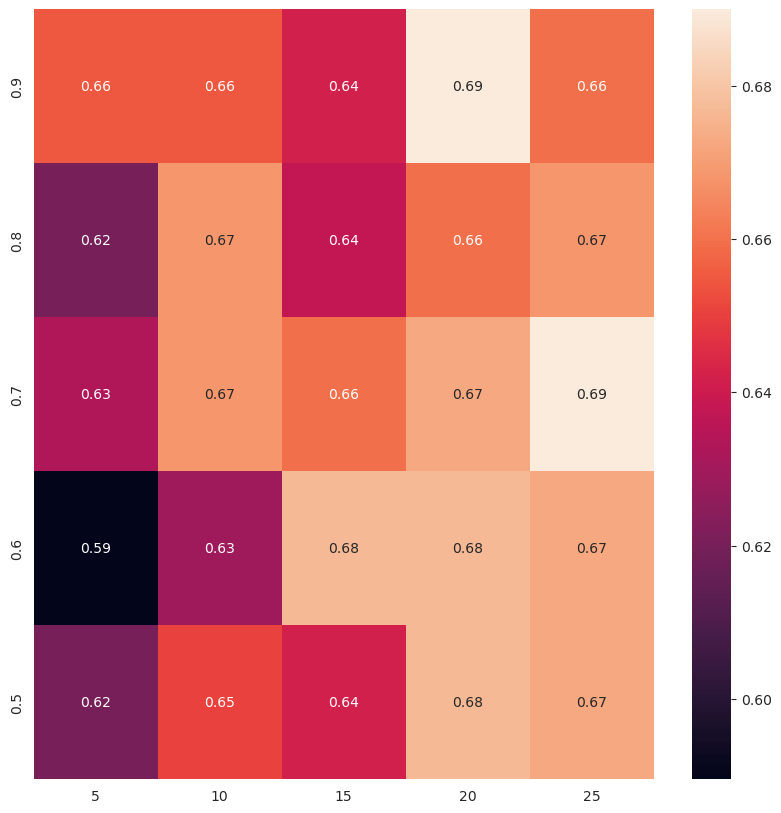

In [24]:
plt.figure(figsize=(10, 10))
sns.heatmap(results, annot=True, xticklabels=n_estimators, yticklabels=fractions)

#### Logistic Regression

In [25]:
results = np.zeros((len(fractions), len(n_estimators)))
for f in range(len(fractions)):
    for n in range(len(n_estimators)):
        y_pred = bagging_classification(X_wine_train, y_wine_train, X_wine_test, n_estimators=n_estimators[n], base_algo='logistic',
                                        sample_fraction=fractions[f], bootstrap=True, voting_mech='soft')
        results[f][n] = accuracy_score(y_pred, y_wine_test)

<Axes: >

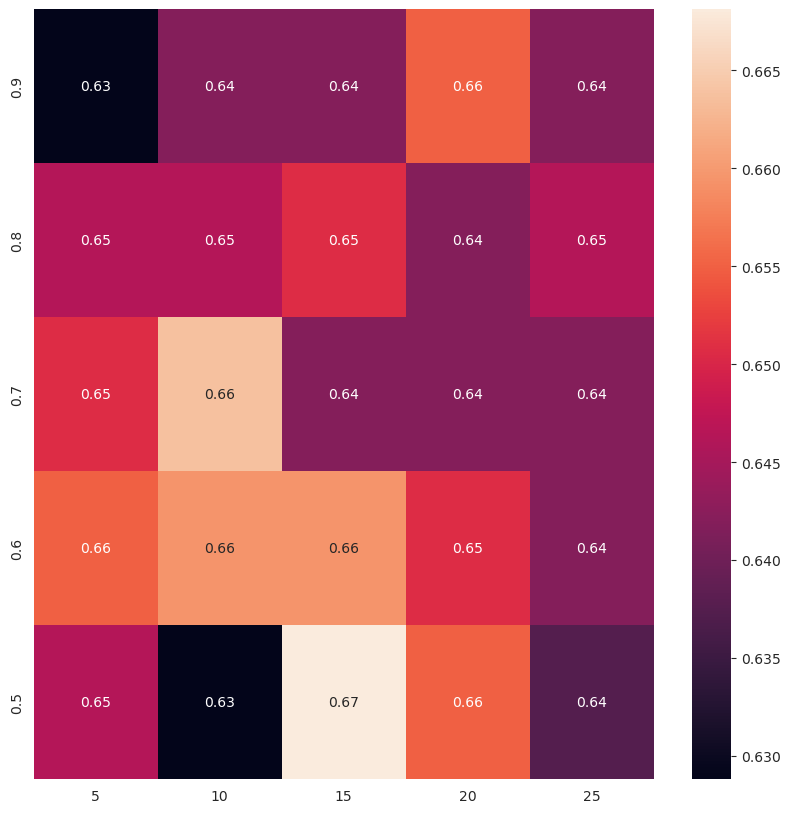

In [26]:
plt.figure(figsize=(10, 10))
sns.heatmap(results, annot=True, xticklabels=n_estimators, yticklabels=fractions)

#### MLP

In [25]:
results = np.zeros((len(fractions), len(n_estimators)))
for f in range(len(fractions)):
    for n in range(len(n_estimators)):
        y_pred = bagging_classification(X_wine_train, y_wine_train, X_wine_test, n_estimators=n_estimators[n], base_algo='mlp',
                                        sample_fraction=fractions[f], bootstrap=True, voting_mech='soft')
        results[f][n] = accuracy_score(y_pred, y_wine_test)

<Axes: >

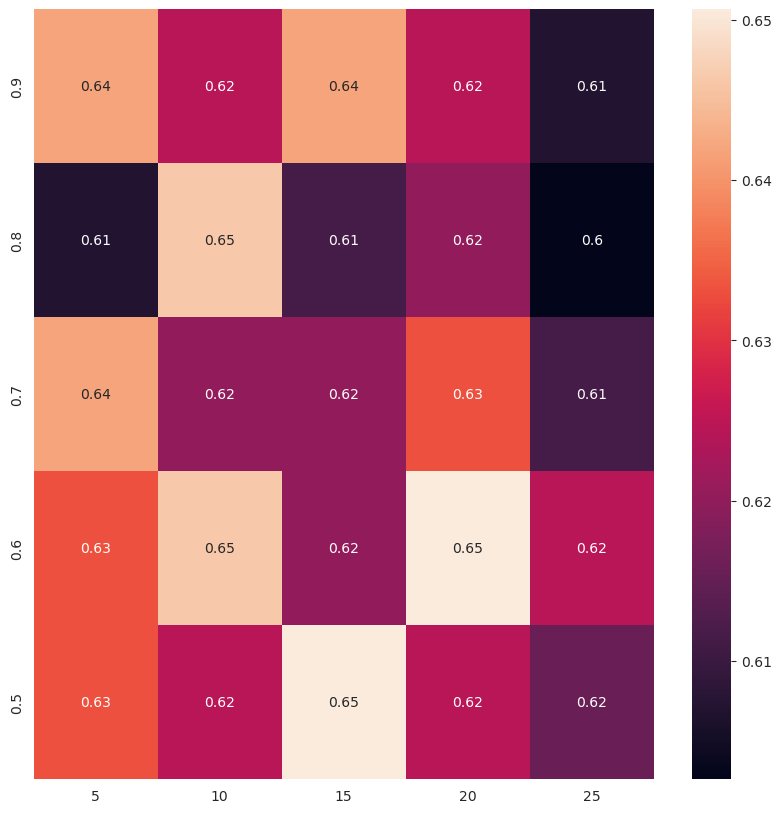

In [26]:
plt.figure(figsize=(10, 10))
sns.heatmap(results, annot=True, xticklabels=n_estimators, yticklabels=fractions)

### Comparison of bagging with base models

In [61]:
df = {
    'Model': [],
    'Type': [],
    'Accuracy': []
}

def update_df(model, model_type, accuracy):
    df['Model'].append(model)
    df['Type'].append(model_type)
    df['Accuracy'].append(accuracy)

In [62]:
# Base models
dt_base = DecisionTreeClassifier(**dt_clf_params)
dt_base.fit(X_wine_train, y_wine_train)
y_pred = dt_base.predict(X_wine_test)
update_df('Decision Tree', 'Base', accuracy_score(y_pred, y_wine_test))

mlp_base = MLPClassifier(**mlp_clf_params)
mlp_base.fit(X_wine_train, y_wine_train)
y_pred = mlp_base.predict(X_wine_test)
update_df('MLP', 'Base', accuracy_score(y_pred, y_wine_test))

log_base = MultinomialLogRegression(**log_reg_params)
log_base.fit(X_wine_train, y_wine_train)
y_pred = log_base.predict(X_wine_test)
update_df('Logistic Regression', 'Base', accuracy_score(y_pred, y_wine_test))

In [63]:
# Ensemble models
update_df('Decision Tree', 'Bagging',
          accuracy_score(bagging_classification(X_wine_train, y_wine_train, X_wine_test, n_estimators=25, base_algo='decision_tree',
                                                       sample_fraction=0.7, bootstrap=True, voting_mech='hard'), y_wine_test))

update_df('MLP', 'Bagging',
            accuracy_score(bagging_classification(X_wine_train, y_wine_train, X_wine_test, n_estimators=20, base_algo='mlp',
                                                         sample_fraction=0.7, bootstrap=True, voting_mech='soft'), y_wine_test))

update_df('Logistic Regression', 'Bagging',
            accuracy_score(bagging_classification(X_wine_train, y_wine_train, X_wine_test, n_estimators=25, base_algo='logistic',
                                                         sample_fraction=0.7, bootstrap=True, voting_mech='soft'), y_wine_test))

/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be r

<Axes: xlabel='Model', ylabel='Accuracy'>

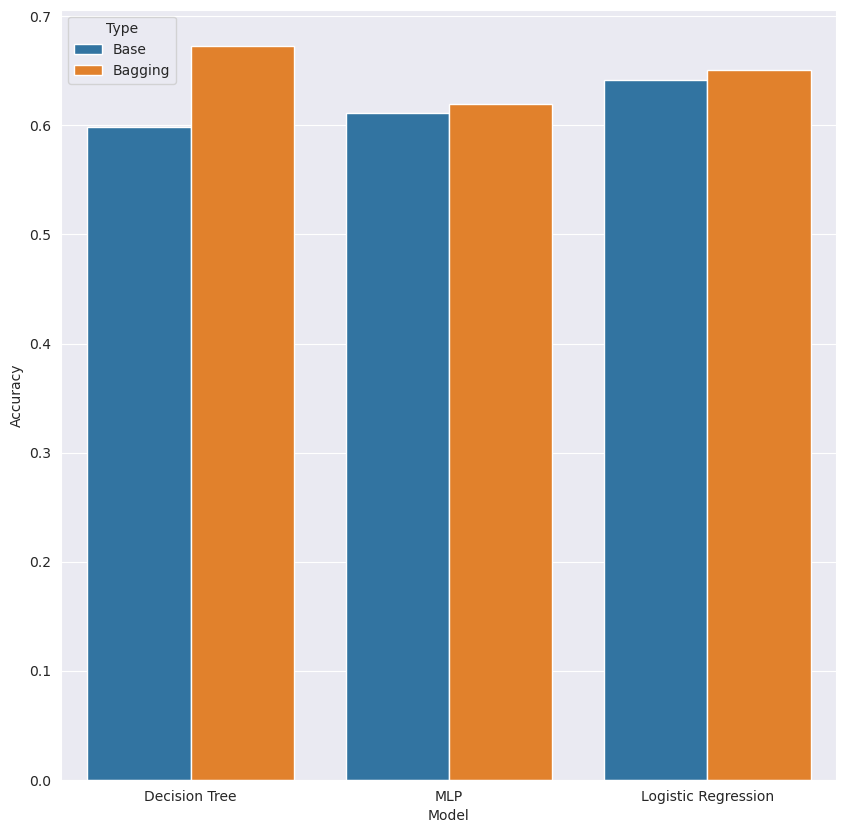

In [64]:
# Plotting results
df_ = pd.DataFrame(df)
plt.figure(figsize=(10, 10))
sns.barplot(x='Model', y='Accuracy', hue='Type', data=df_)

### Bagging for regression

In [53]:
def bagging_regression(X_train, y_train, X, base_algo='decision_tree',
                       n_estimators=10, sample_fraction=0.7, bootstrap=True, voting_mech='soft'):
    def get_model(model_name):
        if model_name == 'linear':
            return LinearRegression(**linear_reg_params)
        elif model_name == 'mlp':
            return MLPRegressor(**mlp_reg_params)
        elif model_name == 'decision_tree':
            return DecisionTreeRegressor(**dt_reg_params)
        else :
            raise ValueError('Invalid base algorithm')
   
    if sample_fraction > 1 or sample_fraction < 0:
        raise ValueError('Invalid sample fraction')
    if type(bootstrap) != bool:
        raise ValueError('Invalid bootstrap value')
    
     # Make val sets
    X_train_, X_val, y_train_, y_val = train_test_split(X_train, y_train, test_size=0.2)
    # Train n_estimators models
    predictions = []
    inv_losses = []
    for i in range(n_estimators):
        if bootstrap:
            # Sample with replacement
            indices = np.random.choice(len(X_train_), size=int(sample_fraction * len(X_train_)), replace=True)
        else:
            # Sample without replacement
            indices = np.random.choice(len(X_train_), size=int(sample_fraction * len(X_train_)), replace=False)
            
        # Train base model on sampled data
        model = get_model(base_algo)
        model.fit(X_train_[indices, :], y_train_[indices])
        inv_losses.append(1 / mean_squared_error(model.predict(X_val), y_val))
        if bootstrap:
            # Sample with replacement
            indices = np.random.choice(len(X_train), size=int(sample_fraction * len(X_train)), replace=True)
        else:
            # Sample without replacement
            indices = np.random.choice(len(X_train), size=int(sample_fraction * len(X_train)), replace=False)
        
        model = get_model(base_algo)
        # train on whole train set
        model.fit(X_train[indices, :], y_train[indices])
        predictions.append(model.predict(X))
    
    predictions = np.array(predictions).squeeze()
    inv_losses = np.array(inv_losses).reshape(-1, 1)
    inv_losses = inv_losses / np.sum(inv_losses)
    results = None
    if voting_mech == 'soft':
        predictions = predictions * inv_losses
        results = np.sum(predictions, axis=0)
    elif voting_mech == 'hard':
        results = np.mean(predictions, axis=0)
    else:
        raise ValueError('Invalid voting mechanism')
    return results

In [54]:
# decision tree regression without bagging
mlp = MLPRegressor(**mlp_reg_params)
mlp.fit(X_boston_train, y_boston_train)
mean_squared_error(mlp.predict(X_boston_test), y_boston_test)

7.75514135410141

In [55]:
# Bagging on decision tree
mean_squared_error(bagging_regression(X_boston_train, y_boston_train, X_boston_test, base_algo='mlp',
                                  n_estimators=10, sample_fraction=0.7, bootstrap=True, voting_mech='soft'), y_boston_test)

7.50711105231013

### Tuning

In [56]:
bagging_reg_params = {}
best_loss = None
for n_estimators in [10, 15, 20]:
    for sample_fraction in [0.8, 0.7, 0.6]:
        for base_algo in ['decision_tree', 'linear', 'mlp']:
            for boot in [True, False]:
                for voting_mech in ['soft', 'hard']:
                    y_pred = bagging_regression(X_boston_train, y_boston_train, X_boston_test, base_algo=base_algo,
                                                n_estimators=n_estimators, sample_fraction=sample_fraction, bootstrap=True, voting_mech=voting_mech)
                    loss = mean_squared_error(y_pred, y_boston_test)
                    if best_loss is None or loss < best_loss:
                        best_loss = loss
                        bagging_reg_params['n_estimators'] = n_estimators
                        bagging_reg_params['sample_fraction'] = sample_fraction
                        bagging_reg_params['base_algo'] = base_algo
                        bagging_reg_params['bootstrap'] = boot
                        bagging_reg_params['voting_mech'] = voting_mech

print(f'Best hyperparameters for bagging are {bagging_reg_params}')
print(f'Best MSE for bagging is {best_loss}')

Best hyperparameters for bagging are {'n_estimators': 10, 'sample_fraction': 0.8, 'base_algo': 'mlp', 'bootstrap': True, 'voting_mech': 'hard'}
Best MSE for bagging is 6.312471184227632


### Heatmap for bagging regression

#### Decision Trees

In [124]:
results = np.zeros((len(fractions), len(n_estimators)))
for f in range(len(fractions)):
    for n in range(len(n_estimators)):
        y_pred = bagging_regression(X_boston_train, y_boston_train, X_boston_test, base_algo='decision_tree',
                                    n_estimators=n_estimators[n], sample_fraction=fractions[f], bootstrap=True, voting_mech='soft')
        results[f][n] = mean_squared_error(y_pred, y_boston_test)

<Axes: >

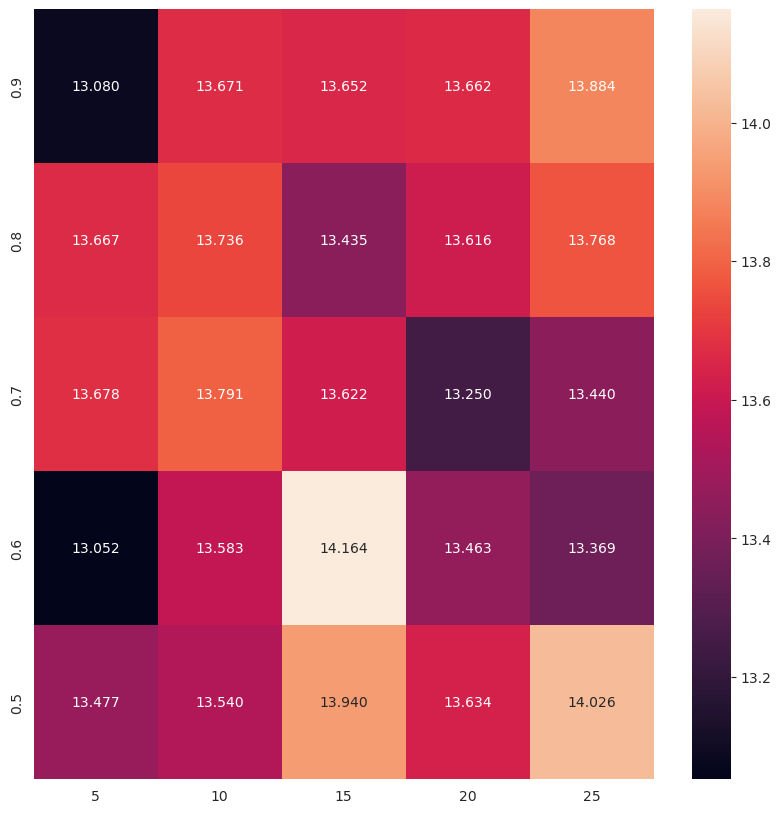

In [128]:
plt.figure(figsize=(10, 10))
sns.heatmap(results, annot=True, xticklabels=n_estimators, yticklabels=fractions, fmt='.3f')

#### Linear Regression

In [126]:
results = np.zeros((len(fractions), len(n_estimators)))
for f in range(len(fractions)):
    for n in range(len(n_estimators)):
        y_pred = bagging_regression(X_boston_train, y_boston_train, X_boston_test, base_algo='linear',
                                    n_estimators=n_estimators[n], sample_fraction=fractions[f], bootstrap=True, voting_mech='soft')
        results[f][n] = mean_squared_error(y_pred, y_boston_test)

<Axes: >

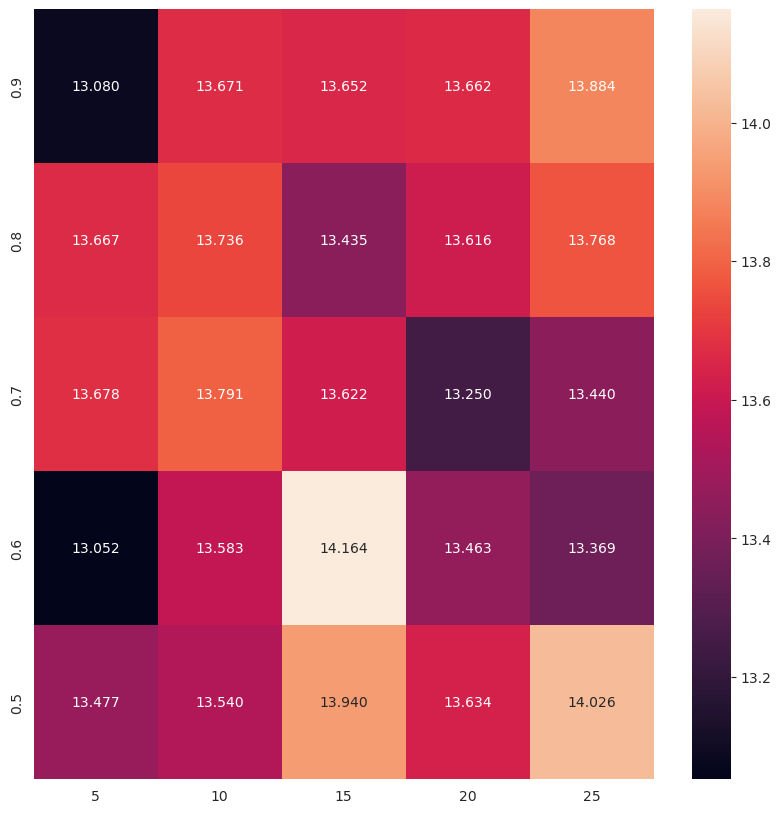

In [127]:
plt.figure(figsize=(10, 10))
sns.heatmap(results, annot=True, xticklabels=n_estimators, yticklabels=fractions, fmt='.3f')

#### MLP

In [129]:
results = np.zeros((len(fractions), len(n_estimators)))
for f in range(len(fractions)):
    for n in range(len(n_estimators)):
        y_pred = bagging_regression(X_boston_train, y_boston_train, X_boston_test, base_algo='mlp',
                                    n_estimators=n_estimators[n], sample_fraction=fractions[f], bootstrap=True, voting_mech='soft')
        results[f][n] = mean_squared_error(y_pred, y_boston_test)

<Axes: >

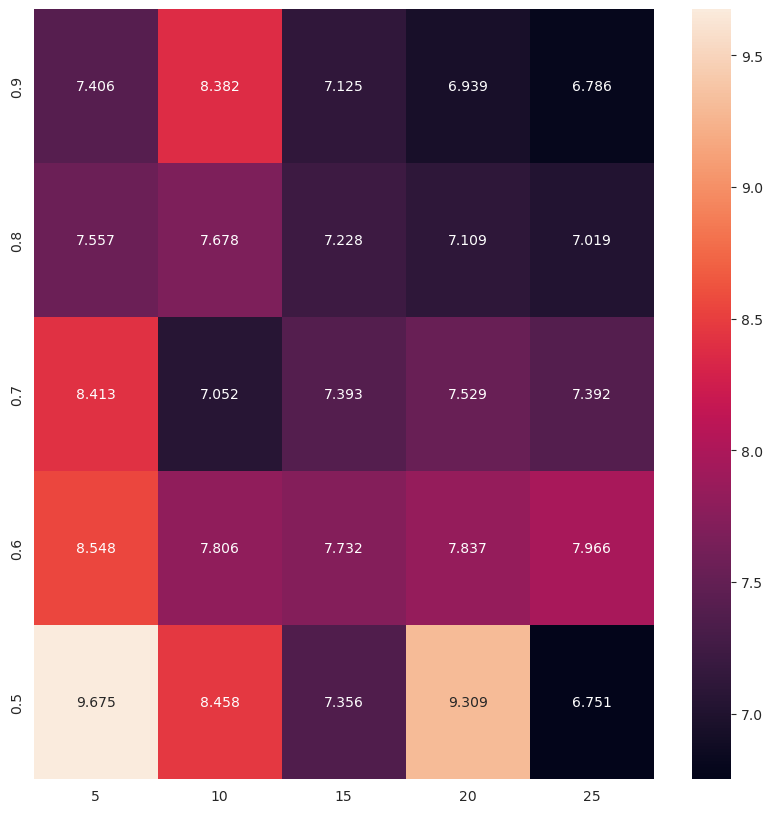

In [130]:
plt.figure(figsize=(10, 10))
sns.heatmap(results, annot=True, xticklabels=n_estimators, yticklabels=fractions, fmt='.3f')

### Comparison with base models

In [131]:
df = {
    'Model': [],
    'Type': [],
    'MSE': []
}

def update_df(model, model_type, mse):
    df['Model'].append(model)
    df['Type'].append(model_type)
    df['MSE'].append(mse)

In [132]:
# Base models
dt_base = DecisionTreeRegressor(**dt_reg_params)
dt_base.fit(X_boston_train, y_boston_train)
update_df('Decision Tree', 'Base', mean_squared_error(dt_base.predict(X_boston_test), y_boston_test))

mlp_base = MLPRegressor(**mlp_reg_params)
mlp_base.fit(X_boston_train, y_boston_train)
update_df('MLP', 'Base', mean_squared_error(mlp_base.predict(X_boston_test), y_boston_test))

log_base = LinearRegression(**linear_reg_params)
log_base.fit(X_boston_train, y_boston_train)
update_df('Linear Regression', 'Base', mean_squared_error(log_base.predict(X_boston_test), y_boston_test))

In [133]:
# Ensemble models
update_df('Decision Tree', 'Bagging',
          mean_squared_error(bagging_regression(X_boston_train, y_boston_train, X_boston_test, base_algo='decision_tree',
                                                       n_estimators=10, sample_fraction=0.8, bootstrap=True, voting_mech='soft'), y_boston_test))

update_df('MLP', 'Bagging',
            mean_squared_error(bagging_regression(X_boston_train, y_boston_train, X_boston_test, base_algo='mlp',
                                                         n_estimators=15, sample_fraction=0.6, bootstrap=True, voting_mech='soft'), y_boston_test))

update_df('Linear Regression', 'Bagging',
            mean_squared_error(bagging_regression(X_boston_train, y_boston_train, X_boston_test, base_algo='linear',
                                                         n_estimators=20, sample_fraction=0.8, bootstrap=True, voting_mech='soft'), y_boston_test))

/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be r

<Axes: xlabel='Model', ylabel='MSE'>

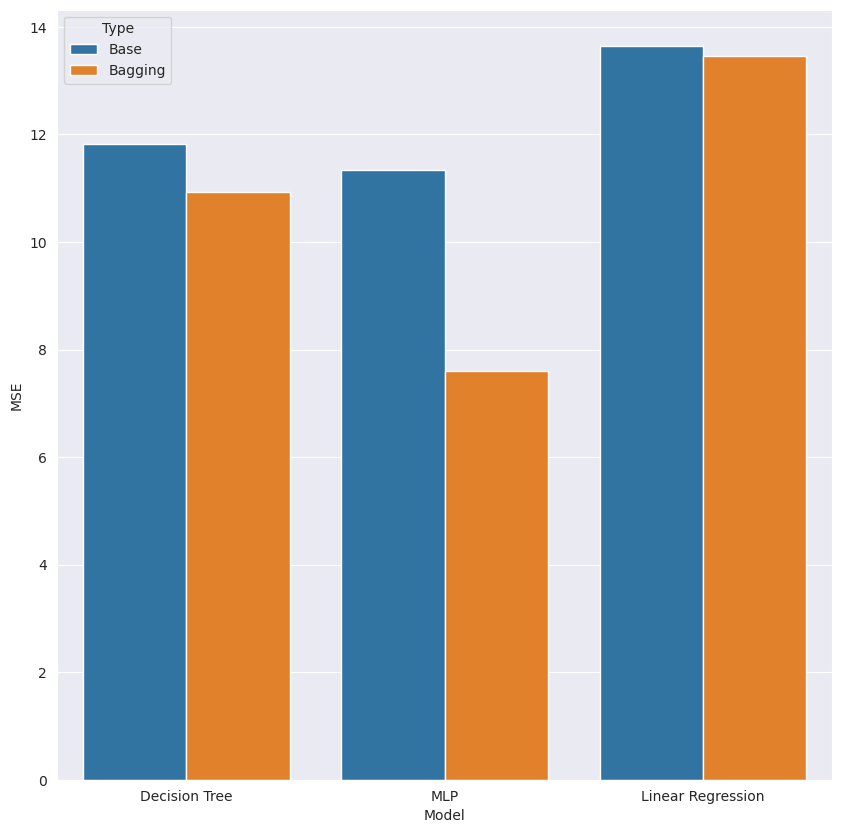

In [134]:
# Plotting results
df_ = pd.DataFrame(df)
plt.figure(figsize=(10, 10))
sns.barplot(x='Model', y='MSE', hue='Type', data=df_)

## 3.3 Stacking

We perform stacking by training a meta learner on the predictions of base learners. 
- Level 0 estimators are previously used base estimators.
- Level 1 estimator can be logistic / linear regression or decision tree.
- Stacking methods can be blending or stacking.

### Stacking for classification

In [65]:
from sklearn.model_selection import KFold

In [66]:
def stacking_classification(X_train, y_train, X, base_algo, meta_algo, method='stacking', n_folds=5, holdout=0.2):
    def get_model(model_name):
        if model_name == 'mlp':
            return MLPClassifier(**mlp_clf_params)
        elif model_name == 'decision_tree':
            return DecisionTreeClassifier(**dt_clf_params)
        elif model_name == 'logistic':
            return MultinomialLogRegression(**log_reg_params)
        else :
            raise ValueError('Invalid model algorithm')
    
    # Parameter validation
    if method not in ['stacking', 'blending']:
        raise ValueError('Invalid stacking method')
    if len(base_algo) == 0:
        raise ValueError('No base algorithms provided')
    if meta_algo not in ['decision_tree', 'logistic']:
        raise ValueError('Invalid meta algorithm')
    
    if n_folds <= 1:
        raise ValueError('Invalid number of folds')
    if holdout > 1 or holdout < 0:
        raise ValueError('Invalid holdout fraction')

    base_algo = set(base_algo)
    for algo in base_algo:
        if algo not in ['mlp', 'decision_tree', 'logistic']:
            raise ValueError('Invalid base algorithm')
    
    # stacking
    if method == 'stacking':
        # Make folds
        folds = KFold(n_splits=n_folds)
        # Store predictions of base learners
        predictions = []
        # Train base learners on folds to predict outcomes for each fold
        for algo in base_algo:
            algo_pred = np.array([])
            for train_indices, val_indices in folds.split(X_train):
                model = get_model(algo)
                model.fit(X_train[train_indices, :], y_train[train_indices])
                algo_pred = np.append(algo_pred, model.predict(X_train[val_indices, :]))
            predictions.append(algo_pred)
        predictions = np.array(predictions).T
        
        # Get predictions on test data from fully trained base learners
        test_predictions = []
        for algo in base_algo:
            model = get_model(algo)
            model.fit(X_train, y_train)
            test_predictions.append(model.predict(X))
        test_predictions = np.array(test_predictions).T
        
        # Train meta learner on predictions of base learners
        meta_learner = get_model(meta_algo)
        meta_learner.fit(predictions, y_train)
        return meta_learner.predict(test_predictions)
    
    # blending
    if method == 'blending':
        # split into base train and holdout
        X_train_, X_holdout, y_train_, y_holdout = train_test_split(X_train, y_train, test_size=holdout)
        # Train on base then extract meta features
        meta_features = []
        meta_features_test = []
        for base in base_algo:
            model = get_model(base)
            model.fit(X_train_, y_train_)
            meta_features.append(model.predict(X_holdout))
            meta_features_test.append(model.predict(X))
            
        meta_features = np.array(meta_features).T
        meta_features_test = np.array(meta_features_test).T
        meta_features = np.concatenate((meta_features, X_holdout), axis=1)
        meta_features_test = np.concatenate((meta_features_test, X), axis=1)
        
        # Train meta learner on both meta and original features of holdout
        meta_learner = get_model(meta_algo)
        meta_learner.fit(meta_features, y_holdout)
        return meta_learner.predict(meta_features_test)

Tuning over stacking parameters

In [52]:
results = []
for base in [['mlp', 'decision_tree', 'logistic'], ['mlp', 'decision_tree'], ['mlp', 'logistic'], ['decision_tree', 'logistic']]:
    for meta in ['decision_tree', 'logistic']:
        for method in ['stacking', 'blending']:
            y_pred = stacking_classification(X_wine_train, y_wine_train, X_wine_test, base_algo=base, meta_algo=meta, method=method)
            results.append(({
                'base_algo': base,
                'meta_algo': meta,
                'method': method,
            }, accuracy_score(y_pred, y_wine_test)))

In [53]:
results = sorted(results, key=lambda x: x[1], reverse=True)
stack_clf_params = results[0][0]
print('Best hyperparameters for stacking classification are:', stack_clf_params)
print('Best model gives accuracy of:', results[0][1])

Best hyperparameters for stacking classification are: {'base_algo': ['decision_tree', 'logistic'], 'meta_algo': 'decision_tree', 'method': 'stacking'}
Best model gives accuracy of: 0.62882096069869


### Comparing with bagging ensembles of each base estimator class

We compare accuracies and training times of bagging and stacking models.

In [67]:
df = {
    'Model': [],
    'Accuracy': [],
    'Time': []
}

In [68]:
import time
def time_function(func, *args):
    start = time.time()
    result = func(*args)
    end = time.time()
    return result, end - start

def update_df(model, accuracy, time):
    df['Model'].append(model)
    df['Accuracy'].append(accuracy)
    df['Time'].append(time)

In [69]:
y_pred, t_train = time_function(bagging_classification, X_wine_train, y_wine_train, X_wine_test, 20, 'mlp',
                                0.6, True, 'soft')
update_df('Bagging MLP', accuracy_score(y_pred, y_wine_test), t_train)

y_pred, t_train = time_function(bagging_classification, X_wine_train, y_wine_train, X_wine_test, 20, 'decision_tree',
                                0.9, True, 'soft')
update_df('Bagging DT', accuracy_score(y_pred, y_wine_test), t_train)

y_pred, t_train = time_function(bagging_classification, X_wine_train, y_wine_train, X_wine_test, 20, 'logistic',
                                0.5, True, 'soft')
update_df('Bagging Log', accuracy_score(y_pred, y_wine_test), t_train)

y_pred, t_train = time_function(stacking_classification, X_wine_train, y_wine_train, X_wine_test, ['decision_tree', 'logistic'],
                                'decision_tree', 'stacking')
update_df('Stacking best', accuracy_score(y_pred, y_wine_test), t_train)

/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Accuracy comparison')

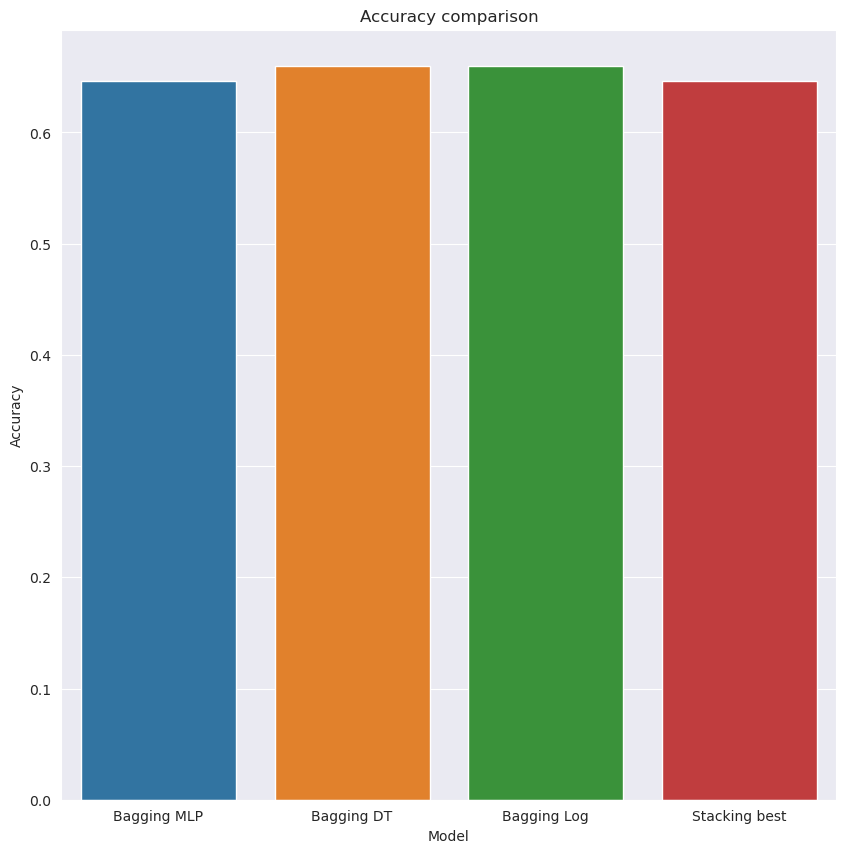

In [70]:
# Plotting results - accuracy
df_ = pd.DataFrame(df)
plt.figure(figsize=(10, 10))
sns.barplot(x='Model', y='Accuracy', data=df_)
plt.title('Accuracy comparison')

/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Train time comparison')

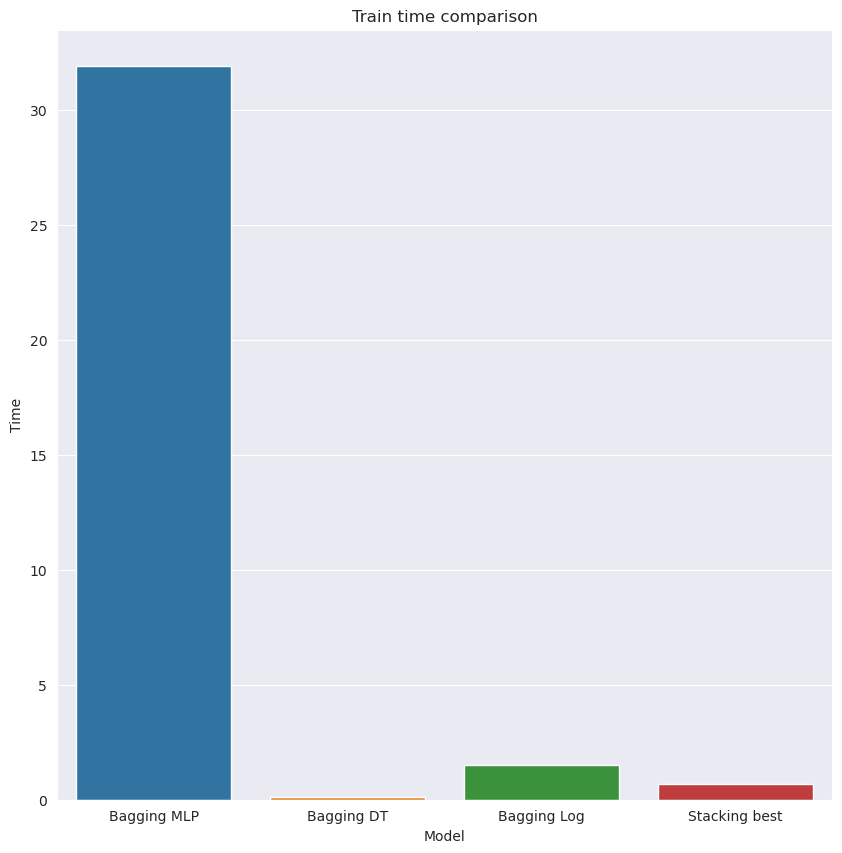

In [71]:
# Plotting results - time
df_ = pd.DataFrame(df)
plt.figure(figsize=(10, 10))
sns.barplot(x='Model', y='Time', data=df_)
plt.title('Train time comparison')

### Stacking for regression

In [27]:
def stacking_regression(X_train, y_train, X, base_algo, meta_algo, method='stacking', n_folds=5, holdout=0.2):
    def get_model(model_name):
        if model_name == 'mlp':
            return MLPRegressor(**mlp_reg_params)
        elif model_name == 'decision_tree':
            return DecisionTreeRegressor(**dt_reg_params)
        elif model_name == 'linear':
            return LinearRegression(**linear_reg_params)
        else :
            raise ValueError('Invalid model algorithm')
    
    # Parameter validation
    if method not in ['stacking', 'blending']:
        raise ValueError('Invalid stacking method')
    if len(base_algo) == 0:
        raise ValueError('No base algorithms provided')
    if meta_algo not in ['decision_tree', 'linear']:
        raise ValueError('Invalid meta algorithm')
    
    if n_folds <= 1:
        raise ValueError('Invalid number of folds')
    if holdout > 1 or holdout < 0:
        raise ValueError('Invalid holdout fraction')

    base_algo = set(base_algo)
    for algo in base_algo:
        if algo not in ['mlp', 'decision_tree', 'linear']:
            raise ValueError('Invalid base algorithm')
    
    # stacking
    if method == 'stacking':
        # Make folds
        folds = KFold(n_splits=n_folds)
        # Store predictions of base learners
        predictions = []
        # Train base learners on folds to predict outcomes for each fold
        for algo in base_algo:
            algo_pred = np.array([])
            for train_indices, val_indices in folds.split(X_train):
                model = get_model(algo)
                model.fit(X_train[train_indices, :], y_train[train_indices])
                algo_pred = np.append(algo_pred, model.predict(X_train[val_indices, :]))
            predictions.append(algo_pred)
            
        predictions = np.array(predictions).T
        
        # Get predictions on test data from fully trained base learners
        test_predictions = []
        for algo in base_algo:
            model = get_model(algo)
            model.fit(X_train, y_train)
            algo_pred = model.predict(X).reshape(-1, 1)
            test_predictions.append(algo_pred)
        test_predictions = np.squeeze(np.array(test_predictions).T)
        
        # Scale features made
        meta_features = StandardScaler().fit_transform(test_predictions)
        meta_features_test = StandardScaler().fit_transform(predictions)
        
        # Train meta learner on predictions of base learners
        meta_learner = get_model(meta_algo)
        meta_learner.fit(predictions, y_train)
        return meta_learner.predict(test_predictions)
    
    # blending
    if method == 'blending':
        # split into base train and holdout
        X_train_, X_holdout, y_train_, y_holdout = train_test_split(X_train, y_train, test_size=holdout)
        # Train on base then extract meta features
        meta_features = []
        meta_features_test = []
        for base in base_algo:
            model = get_model(base)
            model.fit(X_train_, y_train_)
            meta_features.append(model.predict(X_holdout).reshape(-1, 1))
            meta_features_test.append(model.predict(X).reshape(-1, 1))
            
        meta_features = np.squeeze(np.array(meta_features).T)
        meta_features_test = np.squeeze(np.array(meta_features_test).T)
        meta_features = np.concatenate((meta_features, X_holdout), axis=1)
        meta_features_test = np.concatenate((meta_features_test, X), axis=1)
        
        # Scale features made
        meta_features = StandardScaler().fit_transform(meta_features)
        meta_features_test = StandardScaler().fit_transform(meta_features_test)
        
        # Train meta learner on both meta and original features of holdout
        meta_learner = get_model(meta_algo)
        meta_learner.fit(meta_features, y_holdout)
        return meta_learner.predict(meta_features_test)

Tuning over stacking parameters

In [140]:
results = []
for base in [['mlp', 'decision_tree', 'linear'], ['mlp', 'decision_tree'], ['mlp', 'linear'], ['decision_tree', 'linear']]:
    for meta in ['decision_tree', 'linear']:
        for method in ['stacking', 'blending']:
            y_pred = stacking_regression(X_boston_train, y_boston_train, X_boston_test, base_algo=base, meta_algo=meta, method=method)
            results.append(({
                'base_algo': base,
                'meta_algo': meta,
                'method': method,
            }, mean_squared_error(y_pred, y_boston_test)))

/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:478: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:478: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:478: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:478: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)


In [141]:
results = sorted(results, key=lambda x: x[1])
stack_reg_params = results[0][0]
print('Best hyperparameters for stacking regression are:', stack_reg_params)
print('Best model gives MSE of:', results[0][1])

Best hyperparameters for stacking regression are: {'base_algo': ['mlp', 'linear'], 'meta_algo': 'decision_tree', 'method': 'stacking'}
Best model gives MSE of: 9.807219387755104


### Comparing with bagging ensembles of each base estimator class

We compare accuracies and training times of bagging and stacking models.

In [142]:
df = {
    'Model': [],
    'MSE': [],
    'Time': []
}

In [40]:
import time
def time_function(func, *args):
    start = time.time()
    result = func(*args)
    end = time.time()
    return result, end - start

def update_df(model, mse, time):
    df['Model'].append(model)
    df['MSE'].append(mse)
    df['Time'].append(time)

In [144]:
y_pred, t_train = time_function(bagging_regression, X_boston_train, y_boston_train, X_boston_test, 'mlp',
                                15, 0.6, True, 'soft')
update_df('Bagging MLP', mean_squared_error(y_pred, y_boston_test), t_train)

y_pred, t_train = time_function(bagging_regression, X_boston_train, y_boston_train, X_boston_test, 'decision_tree',
                                10, 0.8, True, 'soft')
update_df('Bagging DT', mean_squared_error(y_pred, y_boston_test), t_train)

y_pred, t_train = time_function(bagging_regression, X_boston_train, y_boston_train, X_boston_test, 'linear',
                                20, 0.8, True, 'soft')
update_df('Bagging Linear', mean_squared_error(y_pred, y_boston_test), t_train)

y_pred, t_train = time_function(stacking_regression, X_boston_train, y_boston_train, X_boston_test, ['mlp', 'linear'],
                                'decision_tree', 'stacking')
update_df('Stacking best', mean_squared_error(y_pred, y_boston_test), t_train)

/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'MSE comparison')

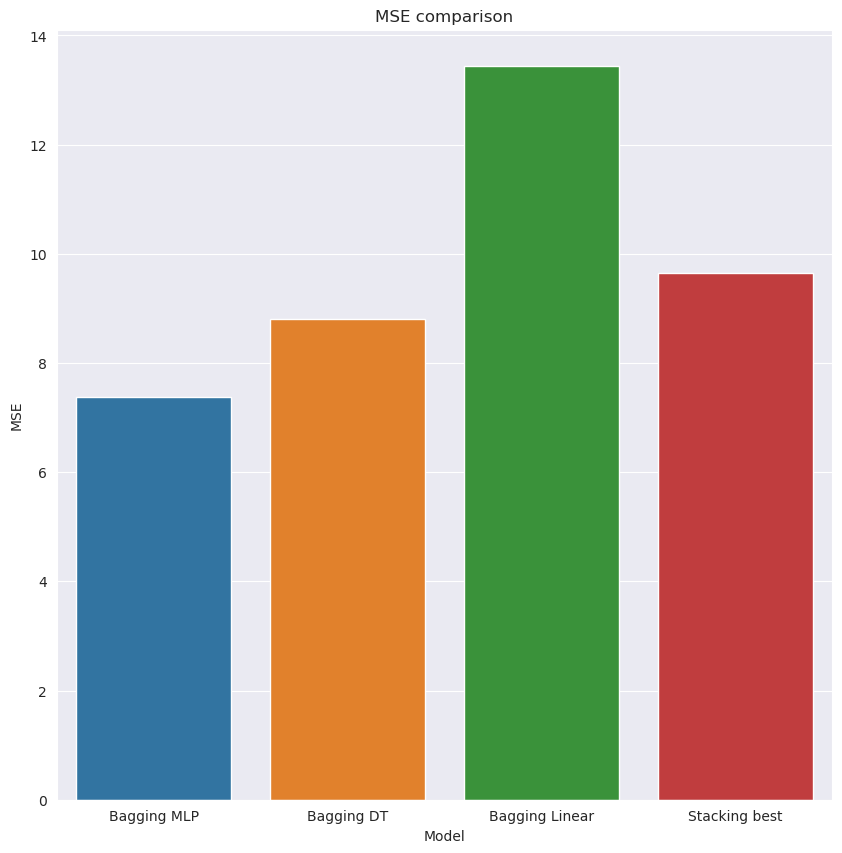

In [145]:
# Plotting results - accuracy
df_ = pd.DataFrame(df)
plt.figure(figsize=(10, 10))
sns.barplot(x='Model', y='MSE', data=df_)
plt.title('MSE comparison')

/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Train time comparison')

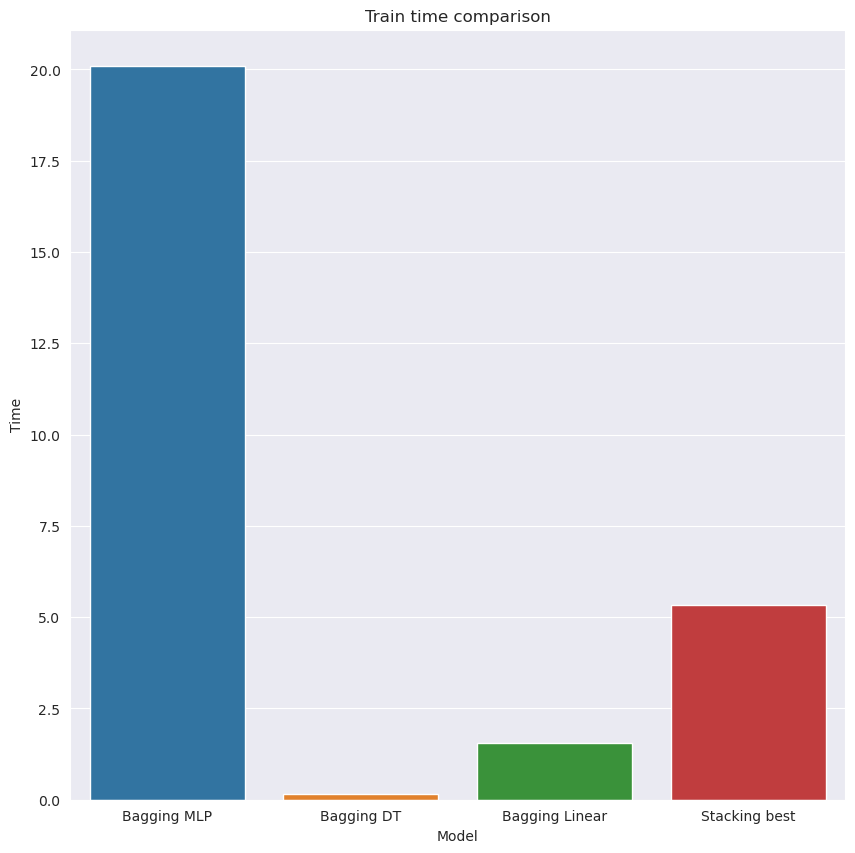

In [146]:
# Plotting results - time
df_ = pd.DataFrame(df)
plt.figure(figsize=(10, 10))
sns.barplot(x='Model', y='Time', data=df_)
plt.title('Train time comparison')

## 4  Random Forest vs Boosted Trees

We need to convert the classification problem into binary:
- is the quality >= 6 or not (0 or 1)

In [163]:
y_wine_test = (y_wine_test >= 6).astype(int)
y_wine_train = (y_wine_train >= 6).astype(int)

### Random Forests

In [72]:
# Tuning bagging with decision trees for best params
param_grid = {
    'n_estimators': [10, 25, 50, 100],
    'sample_fraction': [0.6, 0.7, 0.8, 0.9],
    'bootstrap': [True, False],
    'voting_mech': ['soft', 'hard']
}

#### Tuning of Random Forest Classifier

In [73]:
# Random Forest Classifier
results = []
for n_estimators in param_grid['n_estimators']:
    for sample_frac in param_grid['sample_fraction']:
        for bootstrap in param_grid['bootstrap']:
            for voting_mech in param_grid['voting_mech']:
                y_pred = bagging_classification(X_wine_train, y_wine_train, X_wine_test, n_estimators=n_estimators, base_algo='decision_tree',
                                                       sample_fraction=sample_frac, bootstrap=bootstrap, voting_mech=voting_mech)
                results.append(
                    (
                        {
                        'n_estimators': n_estimators,
                        'sample_fraction': sample_frac,
                        'bootstrap': bootstrap,
                        'voting_mech': voting_mech
                        }, accuracy_score(y_pred, y_wine_test)
                    )
                )

In [74]:
results = sorted(results, key=lambda x: x[1], reverse=True)
rfc_params = results[0][0]
print('Best hyperparameters for random forest classifier are:', rfc_params)
print('Accuracy of best model is:', results[0][1])

Best hyperparameters for random forest classifier are: {'n_estimators': 50, 'sample_fraction': 0.9, 'bootstrap': True, 'voting_mech': 'hard'}
Accuracy of best model is: 0.7205240174672489


#### Tuning of Random Forest Regressor

In [78]:
# Random Forest Regressor
results = []
for n_estimators in param_grid['n_estimators']:
    for sample_frac in param_grid['sample_fraction']:
        for bootstrap in param_grid['bootstrap']:
            for voting_mech in param_grid['voting_mech']:
                y_pred = bagging_regression(X_boston_train, y_boston_train, X_boston_test, n_estimators=n_estimators, base_algo='decision_tree',
                                                       sample_fraction=sample_frac, bootstrap=bootstrap, voting_mech=voting_mech)
                results.append(
                    (
                        {
                        'n_estimators': n_estimators,
                        'sample_fraction': sample_frac,
                        'bootstrap': bootstrap,
                        'voting_mech': voting_mech
                        }, mean_squared_error(y_pred, y_boston_test)
                    )
                )

In [79]:
results = sorted(results, key=lambda x: x[1], reverse=False)
rfr_params = results[0][0]
print('Best hyperparameters for random forest regressor are:', rfr_params)
print('MSE of best model is:', results[0][1])

Best hyperparameters for random forest regressor are: {'n_estimators': 10, 'sample_fraction': 0.9, 'bootstrap': True, 'voting_mech': 'hard'}
MSE of best model is: 8.652495408163263


#### Plotting Training Time and Performance

##### Random Forest Classifier

In [55]:
df = {
    'Model': [],
    'Estimators': [],
    'Accuracy': [],
    'Time': []
}

In [56]:
def update_df(model, n_estimators, accuracy, time):
    df['Model'].append(model)
    df['Estimators'].append(n_estimators)
    df['Accuracy'].append(accuracy)
    df['Time'].append(time)

In [57]:
for n_estimators in [10, 25, 50, 100, 150, 200]:
    for t in range(5):
        y_pred, t_train = time_function(bagging_classification, X_wine_train, y_wine_train, X_wine_test, n_estimators, 'decision_tree',
                                                           0.8, True, 'soft')
        update_df('Random Forest', n_estimators, accuracy_score(y_pred, y_wine_test), t_train)

/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

Text(0.5, 1.0, 'Accuracy vs number of estimators')

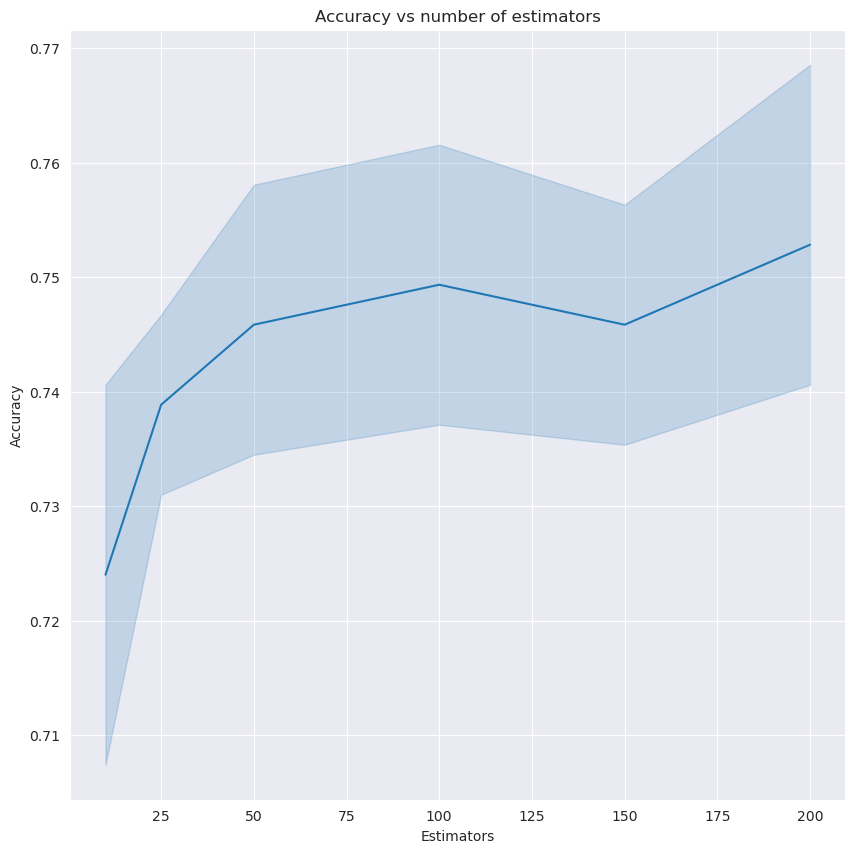

In [58]:
# Line plot
df_ = pd.DataFrame(df)
plt.figure(figsize=(10, 10))
sns.lineplot(x='Estimators', y='Accuracy', data=df_)
plt.title('Accuracy vs number of estimators')

/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

Text(0.5, 1.0, 'Train Time vs number of estimators')

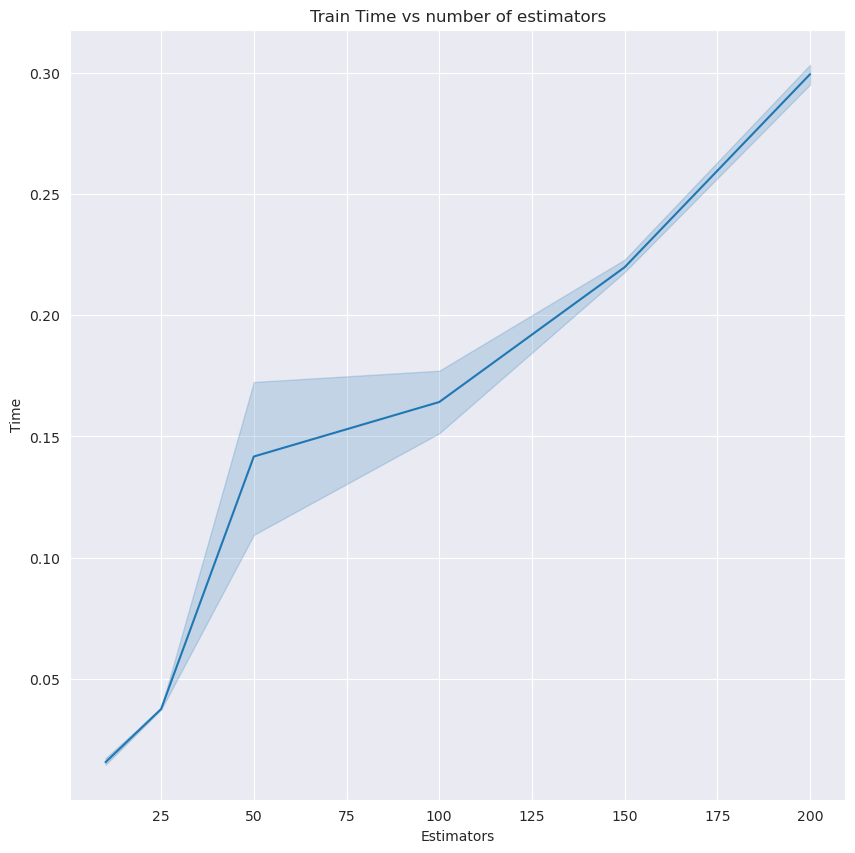

In [59]:
# Plotting train times
df_ = pd.DataFrame(df)
plt.figure(figsize=(10, 10))
sns.lineplot(x='Estimators', y='Time', data=df_)
plt.title('Train Time vs number of estimators')

##### Random Forest Regressor

In [60]:
df = {
    'Model': [],
    'Estimators': [],
    'MSE': [],
    'Time': []
}

In [61]:
def update_df(model, n_estimators, mse, time):
    df['Model'].append(model)
    df['Estimators'].append(n_estimators)
    df['MSE'].append(mse)
    df['Time'].append(time)

In [63]:
for n_estimators in [10, 25, 50, 100, 150, 200]:
    for t in range(5):
        y_pred, t_train = time_function(bagging_regression, X_boston_train, y_boston_train, X_boston_test, 'decision_tree', n_estimators,
                                                           0.8, True, 'soft')
        update_df('Random Forest', n_estimators, mean_squared_error(y_pred, y_boston_test), t_train)

/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

Text(0.5, 1.0, 'MSE vs number of estimators')

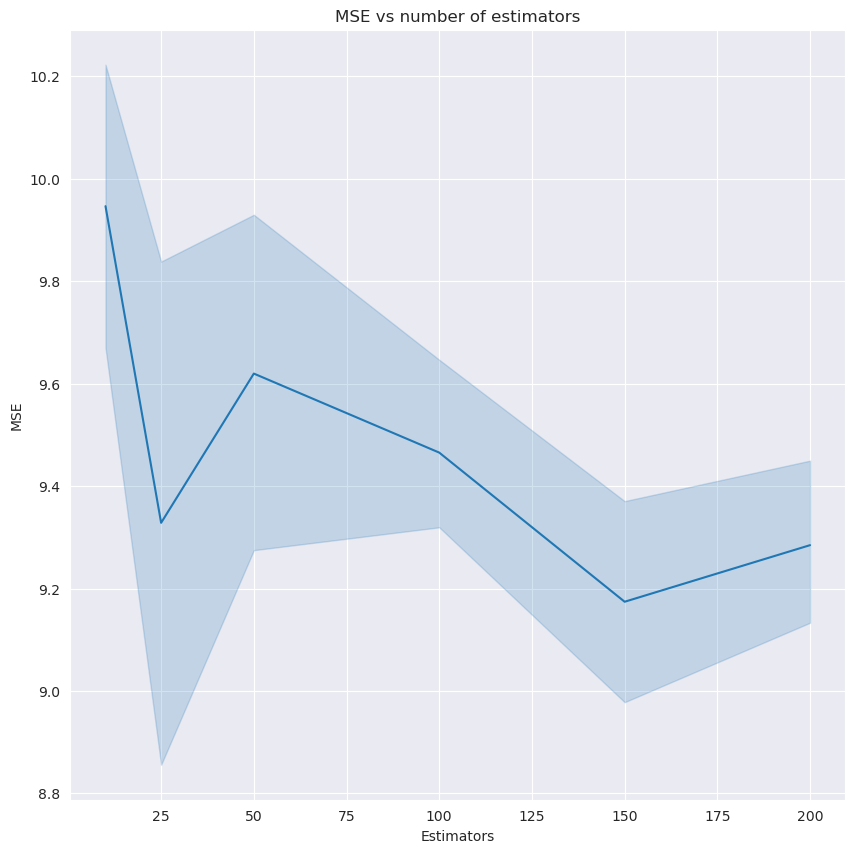

In [64]:
# MSE plot
df_ = pd.DataFrame(df)
plt.figure(figsize=(10, 10))
sns.lineplot(x='Estimators', y='MSE', data=df_)
plt.title('MSE vs number of estimators')

/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

Text(0.5, 1.0, 'Train Time vs number of estimators')

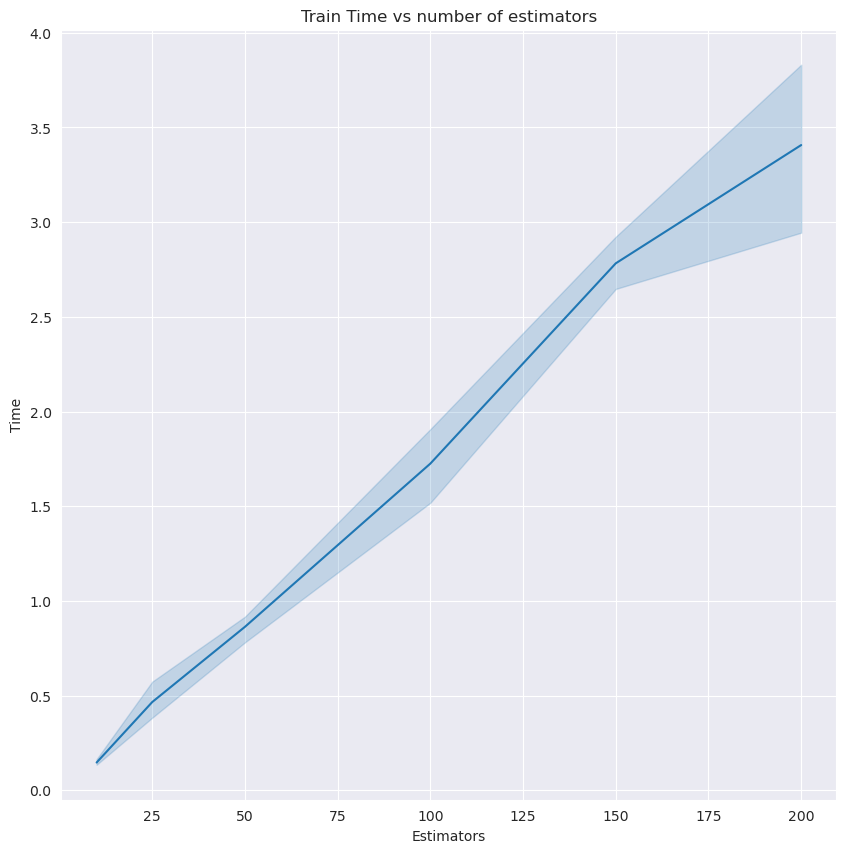

In [65]:
# Plotting train times
df_ = pd.DataFrame(df)
plt.figure(figsize=(10, 10))
sns.lineplot(x='Estimators', y='Time', data=df_)
plt.title('Train Time vs number of estimators')

### AdaBoosted trees

#### Implementation of AdaBoost Classifier

In [30]:
def ada_boost_classifier(X, y, X_test, iters=50, stub_depth=2):
    n_samples, n_features = X.shape
    weights = np.ones(n_samples) / n_samples
    models = []
    alphas = []
    
    # Change data from 0 to -1 for convenience
    y[y == 0] = -1
    for _ in range(iters):
        model = DecisionTreeClassifier(max_depth=stub_depth)
        model.fit(X, y, sample_weight=weights)
        predictions = model.predict(X)

        weighted_error = np.sum(weights * (predictions != y))

        # Calculate alpha
        alpha = 0.5 * np.log((1 - weighted_error) / max(weighted_error, 1e-10))
        alphas.append(alpha)

        # Update weights
        weights *= np.exp(-alpha * y * predictions)
        weights /= np.sum(weights)

        models.append(model)
        
    # Use models to predict
    predictions = np.zeros(X_test.shape[0])

    for model, alpha in zip(models, alphas):
        model_pred = model.predict(X_test)
        predictions += alpha * model_pred

    # Get final predictions
    final_predictions = (predictions > 0).astype(int)
    
    # Change back y from -1 to 0
    y[y == -1] = 0
    return final_predictions

#### Tuning for best hyperparameters for AdaBoost Classifier

In [64]:
ada_clf_params = {}
best_acc = None
for iters in [25, 50, 100, 200]:
    for stub_depth in [2, 3, 4, 5]:
        y_pred = ada_boost_classifier(X_wine_train, y_wine_train, X_wine_test, iters=iters, stub_depth=stub_depth)
        if best_acc is None or accuracy_score(y_pred, y_wine_test) > best_acc:
            best_acc = accuracy_score(y_pred, y_wine_test)
            ada_clf_params['iters'] = iters
            ada_clf_params['stub_depth'] = stub_depth
            
print('Best hyperparameters for AdaBoost classifier are:', ada_clf_params)

Best hyperparameters for AdaBoost classifier are: {'iters': 200, 'stub_depth': 3}


In [65]:
best_acc

0.7903930131004366

AdaBoost gives an accuracy of 0.79 which is better than RFC which gives 0.75

#### Implementation of AdaBoost Regressor

In [31]:
def weighted_median(matrix, weights):
    n = matrix.shape[0]
    # Get matrix sorted indices
    sort_indices = np.argsort(matrix, axis=1)
    # Get weight matrix by duplicating
    weights_matrix = np.tile(weights, (n, 1))
    # Sort both matrices
    sorted_weights = np.take_along_axis(weights_matrix, sort_indices, axis=1)
    # cumulative
    cumsum = np.cumsum(sorted_weights, axis=1)
    median_indices = np.argmax(cumsum >= 0.5, axis=1)
    return np.take_along_axis(matrix, sort_indices, axis=1)[np.arange(n), median_indices]
    

def ada_boost_regressor(X, y, X_test, iters=50, stub_depth=2): # Adaboost.R2 algorithm
    n_samples, n_features = X.shape
    weights = np.ones((n_samples, 1)) / n_samples
    fitted_values = np.empty((n_samples, iters))
    models = []
    betas = []
    
    for t in range(iters):
        model = DecisionTreeRegressor(max_depth=stub_depth)
        model.fit(X, y, sample_weight=np.ravel(weights))
        models.append(model)
        predictions = model.predict(X)
        fitted_values[:, t] = predictions
        predictions = predictions.reshape(-1, 1)
        
        ## Calculate observation errors
        L_ts = np.abs(y - predictions)  
        L_ts /= np.max(L_ts)
        
        ## Calculate model error (and possibly break)
        Lbar_t = np.sum(weights*L_ts)
        if Lbar_t >= 0.5:
            iters = t
            fitted_values = fitted_values[:,:t]
            models = models[:t]
            break
            
        ## Calculate and record beta 
        beta_t = Lbar_t/(1 - Lbar_t)
        betas.append(beta_t)
            
        ## Reweight
        weights = (weights * beta_t)**(1-L_ts)
        weights /= np.sum(weights)
        
    betas = np.array(betas)
    # Set model weights using beta
    model_weights = np.log(1/betas)
    # Predict
    n_test = X_test.shape[0]
    fitted_values = np.empty((n_test, iters))
    for t, tree in enumerate(models):
        fitted_values[:,t] = tree.predict(X_test)
    model_weights /= np.sum(model_weights)
    return weighted_median(fitted_values, model_weights).reshape(-1, 1)

#### Tuning for best hyperparameters for AdaBoost Regressor

In [87]:
# Tuning AdaBoost regressor
ada_reg_params = {}
best_loss = None
for iters in [25, 50, 100, 200]:
    for stub_depth in [2, 3, 4, 5]:
        y_pred = ada_boost_regressor(X_boston_train, y_boston_train, X_boston_test, iters=iters, stub_depth=stub_depth)
        if best_loss is None or mean_squared_error(y_pred, y_boston_test) < best_loss:
            best_loss = mean_squared_error(y_pred, y_boston_test)
            ada_reg_params['iters'] = iters
            ada_reg_params['stub_depth'] = stub_depth
            
print('Best hyperparameters for AdaBoost regressor are:', ada_reg_params)
print('Best model gives MSE of:', best_loss)

Best hyperparameters for AdaBoost regressor are: {'iters': 200, 'stub_depth': 5}
Best model gives MSE of: 8.129954097415476


AdaBoost gives an MSE of 8.13 which is better than RFR which gives 8.65

#### Plotting Training Time and Performance

##### AdaBoost Classifier

In [69]:
df = {
    'Model': [],
    'Estimators': [],
    'Accuracy': [],
    'Time': []
}

In [70]:
def update_df(model, n_estimators, accuracy, time):
    df['Model'].append(model)
    df['Estimators'].append(n_estimators)
    df['Accuracy'].append(accuracy)
    df['Time'].append(time)

In [71]:
for n_estimators in [10, 25, 50, 100, 150, 200]:
    for t in range(5):
        y_pred, t_train = time_function(ada_boost_classifier, X_wine_train, y_wine_train, X_wine_test, n_estimators, 3)
        update_df('AdaBoost', n_estimators, accuracy_score(y_pred, y_wine_test), t_train)

/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

Text(0.5, 1.0, 'Accuracy vs number of estimators')

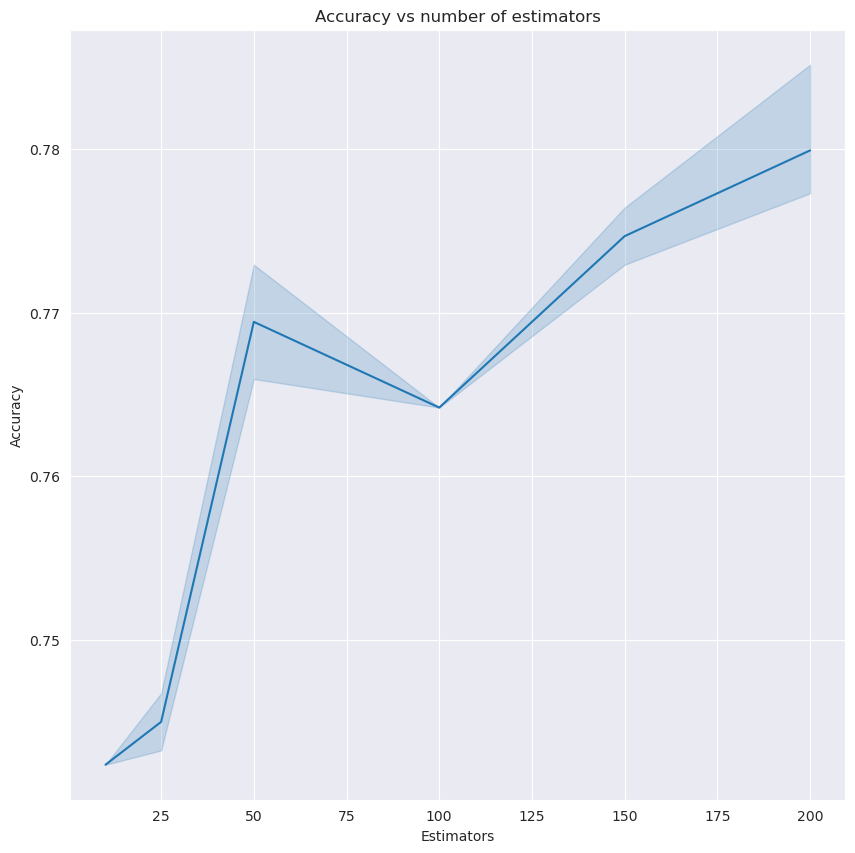

In [72]:
# Accuracy Plot
df_ = pd.DataFrame(df)
plt.figure(figsize=(10, 10))
sns.lineplot(x='Estimators', y='Accuracy', data=df_)
plt.title('Accuracy vs number of estimators')

/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

Text(0.5, 1.0, 'Train Time vs number of estimators')

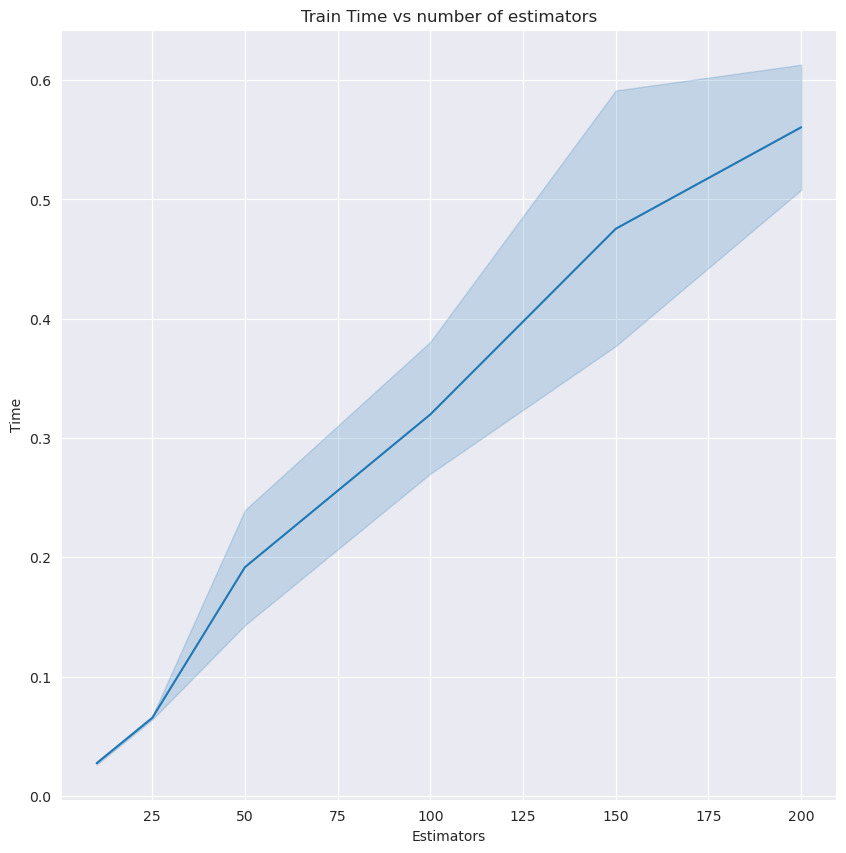

In [76]:
# Plotting train times
plt.figure(figsize=(10, 10))
sns.lineplot(x='Estimators', y='Time', data=df_)
plt.title('Train Time vs number of estimators')

##### AdaBoost Regressor

In [80]:
df = {
    'Model': [],
    'Estimators': [],
    'MSE': [],
    'Time': []
}

In [81]:
def update_df(model, n_estimators, mse, time):
    df['Model'].append(model)
    df['Estimators'].append(n_estimators)
    df['MSE'].append(mse)
    df['Time'].append(time)

In [82]:
for n_estimators in [10, 25, 50, 100, 150, 200]:
    for t in range(5):
        y_pred, t_train = time_function(ada_boost_regressor, X_boston_train, y_boston_train, X_boston_test, n_estimators, 3)
        update_df('AdaBoost', n_estimators, mean_squared_error(y_pred, y_boston_test), t_train)

/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

Text(0.5, 1.0, 'MSE vs number of estimators')

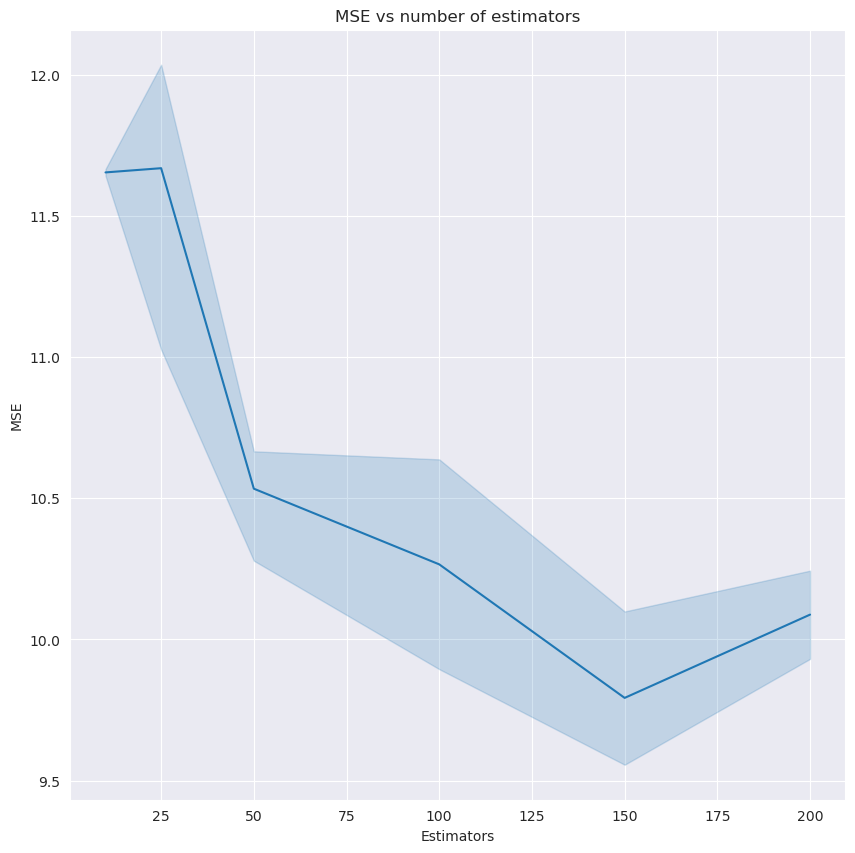

In [83]:
# MSE Plot
df_ = pd.DataFrame(df)
plt.figure(figsize=(10, 10))
sns.lineplot(x='Estimators', y='MSE', data=df_)
plt.title('MSE vs number of estimators')

/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

Text(0.5, 1.0, 'Train Time vs number of estimators')

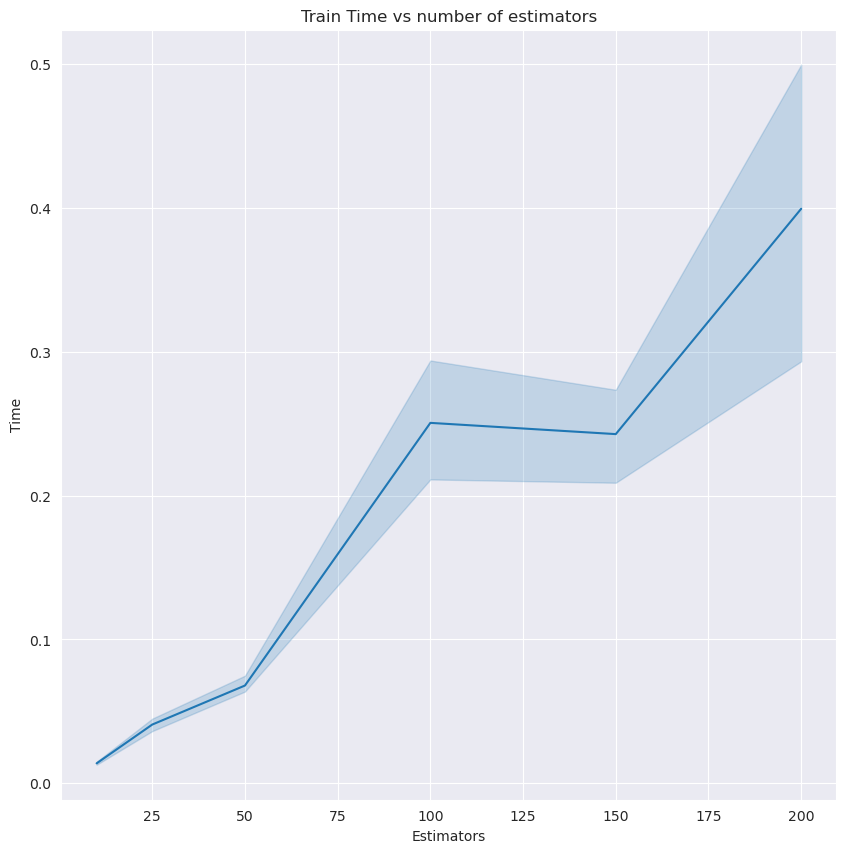

In [84]:
# Plotting train times
plt.figure(figsize=(10, 10))
sns.lineplot(x='Estimators', y='Time', data=df_)
plt.title('Train Time vs number of estimators')

### Gradient Boosted Trees

#### Implementation of Gradient Boosted Classifier

In [122]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def gradient_boost_classifier(X, y, X_test, iters=100, lr=0.15, stub_depth=2):
    models = []
    predicted_log_odds = np.log(np.mean(y) / (1 - np.mean(y))) * np.ones((X.shape[0], 1))
    probabilities = sigmoid(predicted_log_odds)
    params = dt_reg_params
    params['max_depth'] = stub_depth
    leaf_outputs_all = []
    y = y.reshape(-1, 1)
    
    for t in range(iters):
        residuals = y - probabilities
        model = DecisionTreeRegressor(max_depth=stub_depth)
        model.fit(X, residuals)
        models.append(model)
        
        # Get outputs by calculating output from each leaf:
        # output of leaf = sum of residuals / sum of (pi * (1 - pi))
        # where pi is the probability of entry in leaf
        leaf_outputs = np.zeros(model.tree_.node_count)
        leaf_indices = model.apply(X)
        for i in range(model.tree_.node_count):
            leaf_outputs[i] = (np.sum(residuals[leaf_indices == i]) / 
                               (np.sum(probabilities[leaf_indices == i] * (1 - probabilities[leaf_indices == i])) + 1e-10))
        leaf_outputs_all.append(leaf_outputs)
        # Update predicted log odds
        predicted_log_odds += lr * leaf_outputs[leaf_indices].reshape(-1, 1)
        probabilities = sigmoid(predicted_log_odds)
        
    # Predict
    n_test = X_test.shape[0]
    predicted_log_odds = np.log(np.mean(y) / (1 - np.mean(y))) * np.ones((n_test, 1))
    for t, tree in enumerate(models):
        leaf_indices = tree.apply(X_test)
        predicted_log_odds += lr * leaf_outputs_all[t][leaf_indices].reshape(-1, 1)
    y = y.reshape(-1)
    return (predicted_log_odds > 0).astype(int)    

#### Tuning for best hyperparameters for Gradient Boosted Classifier

In [123]:
# Tuning Gradient Boosted classifier
gb_clf_params = {}
best_acc = None
for iters in [25, 50, 100, 200]:
    for lr in [0.1, 0.15, 0.2, 0.25]:
        for stub_depth in [2, 3, 4, 5]:
            y_pred = gradient_boost_classifier(X_wine_train, y_wine_train, X_wine_test, iters=iters, lr=lr, stub_depth=stub_depth)
            if best_acc is None or accuracy_score(y_pred, y_wine_test) > best_acc:
                best_acc = accuracy_score(y_pred, y_wine_test)
                gb_clf_params['iters'] = iters
                gb_clf_params['lr'] = lr
                gb_clf_params['stub_depth'] = stub_depth
                
print('Best hyperparameters for Gradient Boosted classifier are:', gb_clf_params)

Best hyperparameters for Gradient Boosted classifier are: {'iters': 25, 'lr': 0.2, 'stub_depth': 5}


In [124]:
best_acc

0.7991266375545851

Gradient Boosting gives an accuracy of 0.807 which is better than RFC which gives 0.755

#### Implementation of Gradient Boosted Regressor

In [125]:
def gradient_boosted_regressor(X, y, X_test, iters=100, lr=0.15, stub_depth=2):
    models = []
    predictions = np.mean(y) * np.ones((X.shape[0], 1))
    
    for t in range(iters):
        error = y - predictions
        model = DecisionTreeRegressor(max_depth=stub_depth)
        model.fit(X, error)
        models.append(model)
        predictions += lr * model.predict(X).reshape(-1, 1)
        
    # Predict
    n_test = X_test.shape[0]
    predictions = np.tile(np.mean(y), (n_test, 1))
    for t, tree in enumerate(models):
        predictions += lr * tree.predict(X_test).reshape(-1, 1)
    return predictions

#### Tuning for best hyperparameters for Gradient Boosted Trees

In [126]:
# Tuning Gradient Boosted regressor
gb_reg_params = {}
best_loss = None
for iters in [25, 50, 100, 200]:
    for lr in [0.1, 0.15, 0.2, 0.25]:
        for stub_depth in [2, 3, 4, 5]:
            y_pred = gradient_boosted_regressor(X_boston_train, y_boston_train, X_boston_test, iters=iters, lr=lr, stub_depth=stub_depth)
            if best_loss is None or mean_squared_error(y_pred, y_boston_test) < best_loss:
                best_loss = mean_squared_error(y_pred, y_boston_test)
                gb_reg_params['iters'] = iters
                gb_reg_params['lr'] = lr
                gb_reg_params['stub_depth'] = stub_depth
                
print('Best hyperparameters for Gradient Boosted regressor are:', gb_reg_params)

Best hyperparameters for Gradient Boosted regressor are: {'iters': 200, 'lr': 0.15, 'stub_depth': 5}


In [127]:
best_loss

5.514559835110122

Gradient Boosting gives an MSE of 5.67 which is better than RFR which gives 8.65

#### Plotting Training Time and Performance

##### Gradient Boosted Classifier

In [133]:
df = {
    'Model': [],
    'Estimators': [],
    'Accuracy': [],
    'Time': []
}

In [134]:
def update_df(model, n_estimators, accuracy, time):
    df['Model'].append(model)
    df['Estimators'].append(n_estimators)
    df['Accuracy'].append(accuracy)
    df['Time'].append(time)

In [135]:
for n_estimators in [10, 25, 50, 100, 150, 200]:
    for t in range(5):
        y_pred, t_train = time_function(gradient_boost_classifier, X_wine_train, y_wine_train, X_wine_test, n_estimators, 0.25, 5)
        update_df('Gradient Boosting', n_estimators, accuracy_score(y_pred, y_wine_test), t_train)

/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

Text(0.5, 1.0, 'Accuracy vs number of estimators')

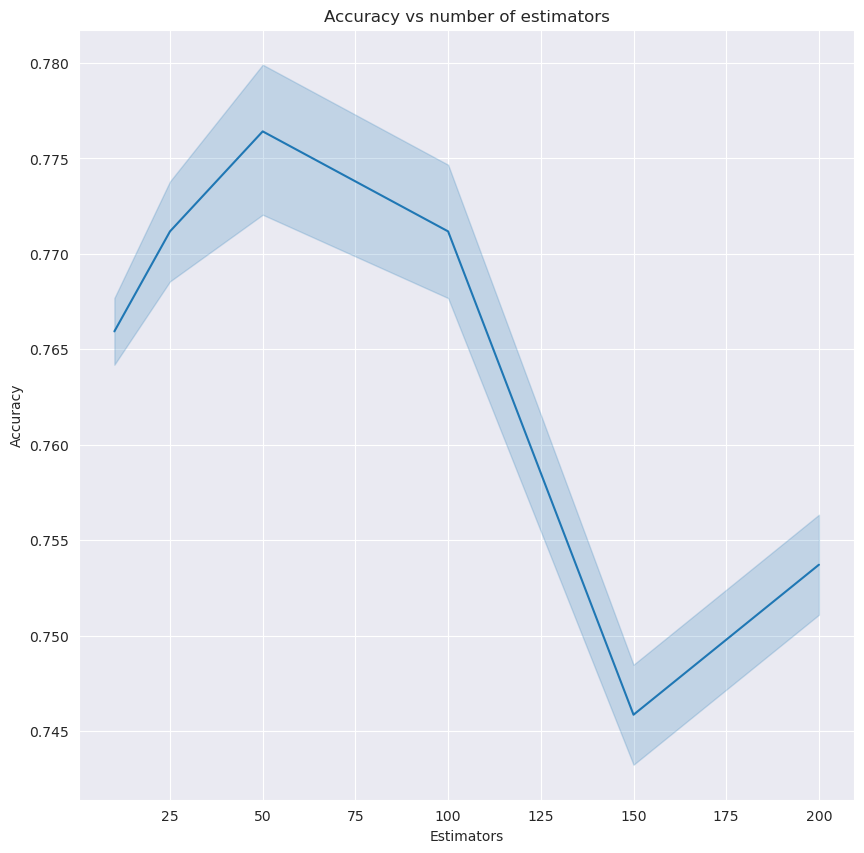

In [136]:
# Accuracy Plot
df_ = pd.DataFrame(df)
plt.figure(figsize=(10, 10))
sns.lineplot(x='Estimators', y='Accuracy', data=df_)
plt.title('Accuracy vs number of estimators')

/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

Text(0.5, 1.0, 'Train Time vs number of estimators')

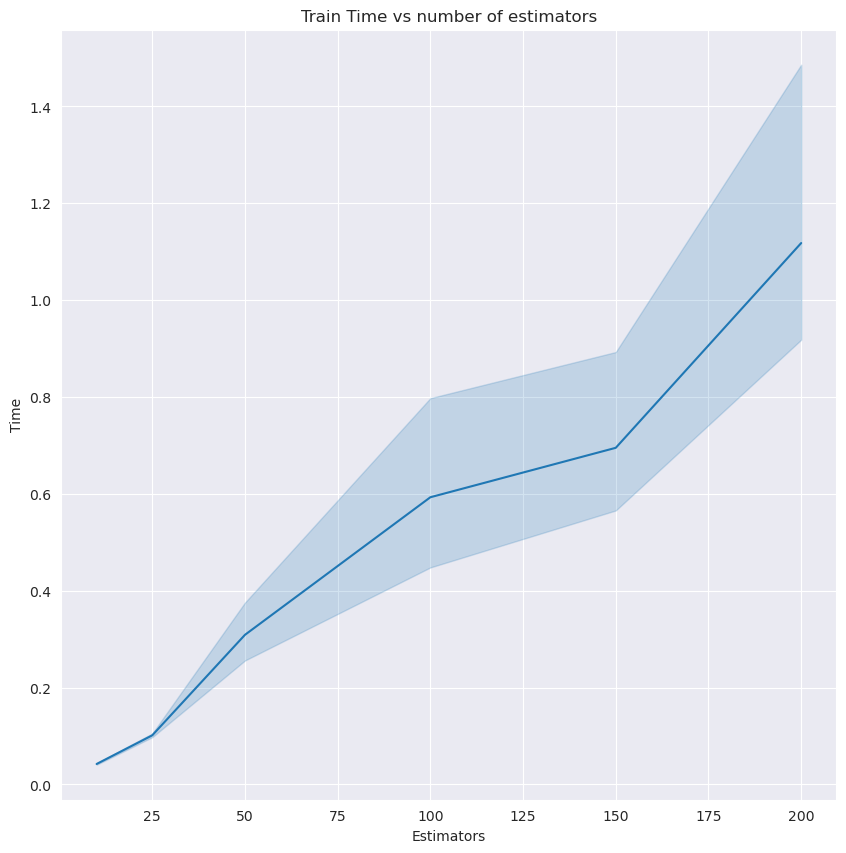

In [137]:
# Plotting train times
plt.figure(figsize=(10, 10))
sns.lineplot(x='Estimators', y='Time', data=df_)
plt.title('Train Time vs number of estimators')

### Analysis of mistakes of boosted models

#### Overlap in mistakes between AdaBoost and Gradient Boosting

In [191]:
y_pred = ada_boost_classifier(X_wine_train, y_wine_train, X_wine_test, iters=200, stub_depth=3)
misclassified_ada = (y_pred != y_wine_test)
misclassified_ada = np.ravel(misclassified_ada)

In [192]:
y_pred = gradient_boost_classifier(X_wine_train, y_wine_train, X_wine_test, iters=200, lr=0.15, stub_depth=3)
y_pred = np.ravel(y_pred)
misclassified_gb = (y_pred != y_wine_test)
misclassified_gb = np.ravel(misclassified_gb)

In [193]:
common = (misclassified_ada == misclassified_gb)

In [194]:
common.sum() / common.shape[0]

0.9126637554585153

There is a >90% overlap in misclassified examples between AdaBoost and Gradient Boosting

In [195]:
df = pd.DataFrame(np.concatenate([X_wine_test, y_wine_test.reshape(-1, 1)], axis=1), columns=wine.columns)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.865059,0.438092,-1.161568,-0.761554,-0.633540,-1.036061,-1.096037,-0.769355,0.695966,-0.338812,-0.870937,0.0
1,-0.807812,1.719039,-0.296867,1.156806,-0.273726,0.037528,0.582441,0.878062,1.398413,0.365727,-1.117457,1.0
2,-0.750566,0.271012,-0.754650,-0.466421,0.086088,1.794311,2.382990,-0.587463,0.823683,-1.043350,0.053515,0.0
3,-0.292593,-0.285922,2.093777,-0.613988,6.943716,-0.157670,-0.424646,-0.088561,-1.411374,2.361921,-1.240717,1.0
4,2.397994,0.382399,1.127346,1.304373,0.276578,-1.036061,-0.973966,2.218862,-0.389634,0.483151,1.347748,1.0


In [196]:
# Adding a column to tell if sample is FP, FN, TP or TN
df['Output-GB'] = ['FP' if not y_wine_test[i] and misclassified_gb[i] else 'FN' if y_wine_test[i] and misclassified_gb[i] else 'TP' if not misclassified_ada[i] and y_wine_test[i] else 'TN' for i in range(df.shape[0])]
df['Output-Ada'] = ['FP' if not y_wine_test[i] and misclassified_ada[i] else 'FN' if y_wine_test[i] and misclassified_ada[i] else 'TP' if not misclassified_ada[i] and y_wine_test[i] else 'TN' for i in range(df.shape[0])]
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Output-GB,Output-Ada
0,-0.865059,0.438092,-1.161568,-0.761554,-0.633540,-1.036061,-1.096037,-0.769355,0.695966,-0.338812,-0.870937,0.0,FP,TN
1,-0.807812,1.719039,-0.296867,1.156806,-0.273726,0.037528,0.582441,0.878062,1.398413,0.365727,-1.117457,1.0,TP,TP
2,-0.750566,0.271012,-0.754650,-0.466421,0.086088,1.794311,2.382990,-0.587463,0.823683,-1.043350,0.053515,0.0,TN,TN
3,-0.292593,-0.285922,2.093777,-0.613988,6.943716,-0.157670,-0.424646,-0.088561,-1.411374,2.361921,-1.240717,1.0,FN,FN
4,2.397994,0.382399,1.127346,1.304373,0.276578,-1.036061,-0.973966,2.218862,-0.389634,0.483151,1.347748,1.0,TP,TP


In [197]:
output_gb = df['Output-GB']
output_ada = df['Output-Ada']

In [198]:
from sklearn.manifold import TSNE

In [199]:
# Plotting tsne
tsne = TSNE(n_components=2)
X_ = tsne.fit_transform(X_wine_test)

/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be r

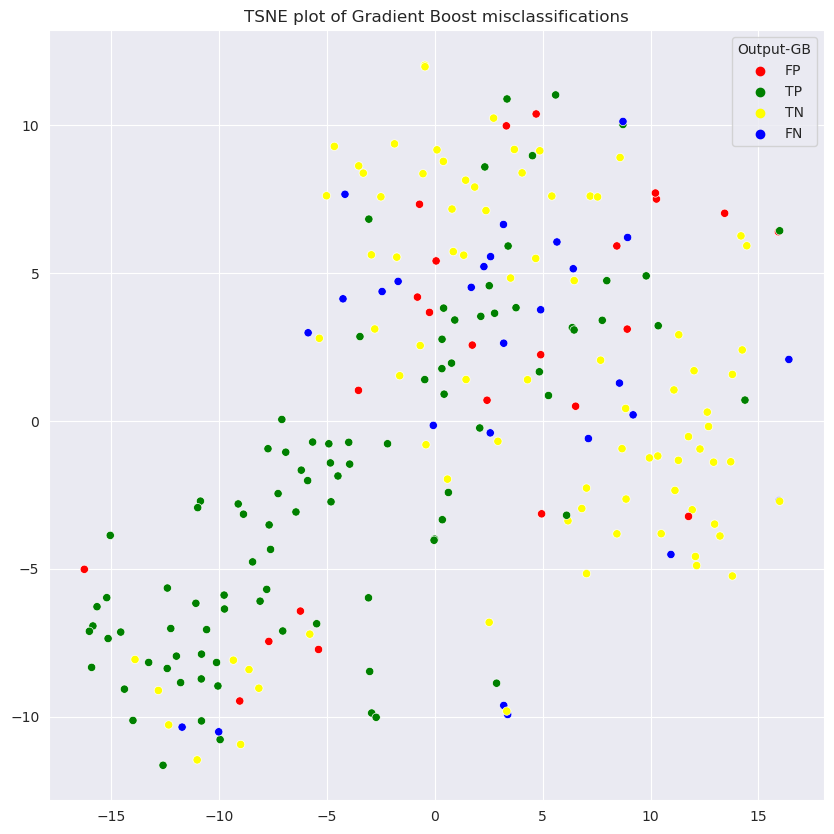

/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be r

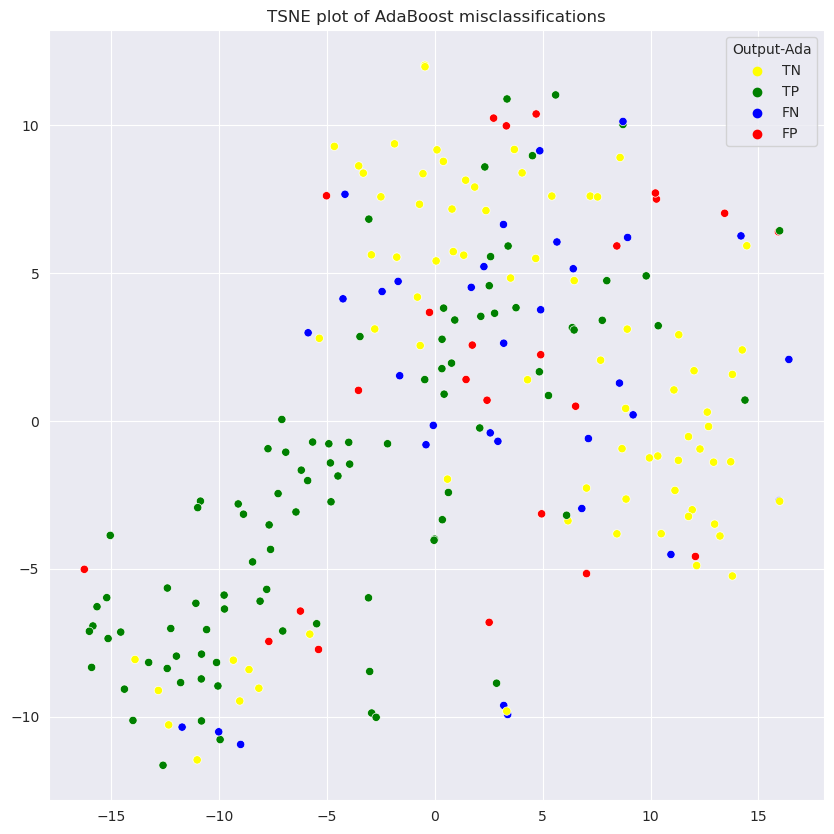

In [203]:
color_dict = {
    'FP': 'red',
    'FN': 'blue',
    'TP': 'green',
    'TN': 'yellow'
}
plt.figure(figsize=(10, 10))
sns.scatterplot(x=X_[:, 0], y=X_[:, 1], hue=output_gb, palette=color_dict)
plt.title('TSNE plot of Gradient Boost misclassifications')
plt.show()
plt.figure(figsize=(10, 10))
sns.scatterplot(x=X_[:, 0], y=X_[:, 1], hue=output_ada, palette=color_dict)
plt.title('TSNE plot of AdaBoost misclassifications')
plt.show()

Plots for both AdaBoost and Gradient Boost look similar. Now we analyse Random Forest.

#### Random Forest mistakes

In [205]:
y_pred = bagging_classification(X_wine_train, y_wine_train, X_wine_test, n_estimators=200, base_algo='decision_tree',
                                                       sample_fraction=0.8, bootstrap=True, voting_mech='soft')

In [206]:
misclassified_rf = (y_pred != y_wine_test)

In [207]:
common = (misclassified_gb == misclassified_rf)

In [208]:
common.sum() / common.shape[0]

0.851528384279476

Overlap is not as great as between AdaBoost and Gradient Boosting. Now we plot the misclassifications.

In [211]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [220]:
x_col = 'volatile acidity'
y_col = 'alcohol'

/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/arnav/miniconda3/envs/smai-ass-3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be r

Text(0.5, 1.0, 'Misclassifications of Random Forest')

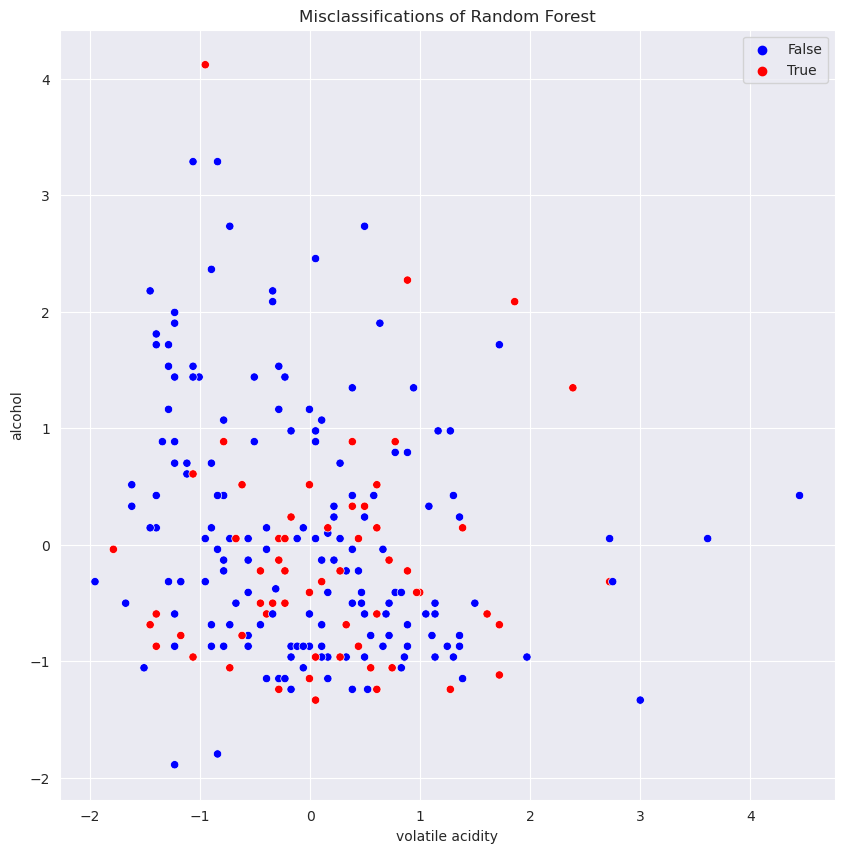

In [221]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=df[x_col], y=df[y_col], hue=misclassified_rf, palette={True: 'red', False: 'blue'})
plt.title('Misclassifications of Random Forest')